In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sbn
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
#tahmin modellemesi
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

In [3]:
xls = pd.ExcelFile('Healthcare_dataset.xlsx')
veri = pd.read_excel(xls, "Dataset")
veri

Ptid Persistency_Flag  Gender           Race     Ethnicity   Region  \
0        P1       Persistent    Male      Caucasian  Not Hispanic     West   
1        P2   Non-Persistent    Male          Asian  Not Hispanic     West   
2        P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3        P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4        P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
...     ...              ...     ...            ...           ...      ...   
3419  P3420       Persistent  Female      Caucasian  Not Hispanic    South   
3420  P3421       Persistent  Female      Caucasian  Not Hispanic    South   
3421  P3422       Persistent  Female      Caucasian  Not Hispanic    South   
3422  P3423   Non-Persistent  Female      Caucasian  Not Hispanic    South   
3423  P3424   Non-Persistent  Female      Caucasian  Not Hispanic    South   

     Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
0           >75  GENERAL PRACTITIONER              Others   
1         55-65  GENERAL PRACTITIONER              Others   
2         65-75  GENERAL PRACTITIONER              Others   
3           >75  GENERAL PRACTITIONER              Others   
4           >75  GENERAL PRACTITIONER              Others   
...         ...                   ...                 ...   
3419        >75  GENERAL PRACTITIONER              Others   
3420        >75               Unknown              Others   
3421        >75         ENDOCRINOLOGY          Specialist   
3422      55-65               Unknown              Others   
3423      65-75               Unknown              Others   

          Ntm_Speciality_Bucket  ... Risk_Family_History_Of_Osteoporosis  \
0     OB/GYN/Others/PCP/Unknown  ...                                   N   
1     OB/GYN/Others/PCP/Unknown  ...                                   N   
2     OB/GYN/Others/PCP/Unknown  ...                                   N   
3     OB/GYN/Others/PCP/Unknown  ...                                   N   
4     OB/GYN/Others/PCP/Unknown  ...                                   N   
...                         ...  ...                                 ...   
3419  OB/GYN/Others/PCP/Unknown  ...                                   N   
3420  OB/GYN/Others/PCP/Unknown  ...                                   N   
3421               Endo/Onc/Uro  ...                                   N   
3422  OB/GYN/Others/PCP/Unknown  ...                                   N   
3423  OB/GYN/Others/PCP/Unknown  ...                                   N   

     Risk_Low_Calcium_Intake  Risk_Vitamin_D_Insufficiency  \
0                          N                             N   
1                          N                             N   
2                          Y                             N   
3                          N                             N   
4                          N                             N   
...                      ...                           ...   
3419                       N                             Y   
3420                       N                             N   
3421                       N                             Y   
3422                       N                             N   
3423                       N                             Y   

     Risk_Poor_Health_Frailty Risk_Excessive_Thinness  \
0                           N                       N   
1                           N                       N   
2                           N                       N   
3                           N                       N   
4                           N                       N   
...                       ...                     ...   
3419                        N                       N   
3420                        N                       N   
3421                        N                       N   
3422                        N                       N   
3423                        N                       

In [4]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [5]:

list(veri.columns)

['Ptid',
 'Persistency_Flag',
 'Gender',
 'Race',
 'Ethnicity',
 'Region',
 'Age_Bucket',
 'Ntm_Speciality',
 'Ntm_Specialist_Flag',
 'Ntm_Speciality_Bucket',
 'Gluco_Record_Prior_Ntm',
 'Gluco_Record_During_Rx',
 'Dexa_Freq_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_Prior_Ntm',
 'Frag_Frac_During_Rx',
 'Risk_Segment_Prior_Ntm',
 'Tscore_Bucket_Prior_Ntm',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment',
 'Adherent_Flag',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorde

In [6]:
tum_veri = set(veri.columns)-set(['Count_Of_Risks'])
matematiksel_veri = set(veri.describe().columns)
kendi_ozeligi = tum_veri-matematiksel_veri

print("All features:", ", ".join(tum_veri), "\nNumerical features:", ", ".join(matematiksel_veri), "\nCategorical features:", ", ".join(kendi_ozeligi))

All features: Ntm_Speciality_Bucket, Frag_Frac_Prior_Ntm, Concom_Anti_Depressants_And_Mood_Stabilisers, Comorb_Other_Disorders_Of_Bone_Density_And_Structure, Risk_Excessive_Thinness, Ethnicity, Comorb_Personal_history_of_malignant_neoplasm, Adherent_Flag, Concom_Viral_Vaccines, Risk_Immobilization, Ntm_Speciality, Risk_Untreated_Chronic_Hypogonadism, Comorb_Encounter_For_Screening_For_Malignant_Neoplasms, Injectable_Experience_During_Rx, Gender, Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx, Change_Risk_Segment, Dexa_During_Rx, Tscore_Bucket_Prior_Ntm, Risk_Segment_During_Rx, Risk_Family_History_Of_Osteoporosis, Risk_Rheumatoid_Arthritis, Persistency_Flag, Comorb_Dorsalgia, Concom_Cephalosporins, Risk_Vitamin_D_Insufficiency, Comorb_Vitamin_D_Deficiency, Gluco_Record_Prior_Ntm, Risk_Chronic_Malnutrition_Or_Malabsorption, Risk_Osteogenesis_Imperfecta, Risk_Untreated_Chronic_Hyperthyroidism, Frag_Frac_During_Rx, Tscore_Bucket_During_Rx, Risk_Hysterectomy_Oophorectomy

In [7]:
len(tum_veri)

68

In [8]:
len(matematiksel_veri)

2

In [9]:
len(kendi_ozeligi)

67

In [10]:
set(veri.columns)-set(veri.describe().columns)-set('Count_Of_Risks')

{'Adherent_Flag',
 'Age_Bucket',
 'Change_Risk_Segment',
 'Change_T_Score',
 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
 'Comorb_Dorsalgia',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Gastro_esophageal_reflux_disease',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Osteoporosis_without_current_pathological_fracture',
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Personal_history_of_malignant_neoplasm',
 'Comorb_Vitamin_D_Deficiency',
 'Concom_Anaesthetics_General',
 'Concom_Anti_Depressants_And_Mood_Stabilisers',
 'Concom_Broad_Spectrum_Penicillins',
 'Concom_Cephalosporins',
 'Concom_Cholesterol_And_Triglyceride_Regulating_

In [11]:
veri.describe()

Dexa_Freq_During_Rx  Count_Of_Risks
count          3424.000000     3424.000000
mean              3.016063        1.239486
std               8.136545        1.094914
min               0.000000        0.000000
25%               0.000000        0.000000
50%               0.000000        1.000000
75%               3.000000        2.000000
max             146.000000        7.000000

In [12]:
veri.shape

(3424, 69)

In [13]:
veri.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

In [14]:
for f in kendi_ozeligi:
    tab = veri[f].value_counts()
    print('%s:\t%s' % (f, ', '.join([ ("%s(%d)" %(tab.index[i], tab.values[i])) for i in range(len(tab))]) ))

Ntm_Speciality_Bucket:	OB/GYN/Others/PCP/Unknown(2104), Endo/Onc/Uro(716), Rheum(604)
Frag_Frac_Prior_Ntm:	N(2872), Y(552)
Concom_Anti_Depressants_And_Mood_Stabilisers:	N(2465), Y(959)
Comorb_Other_Disorders_Of_Bone_Density_And_Structure:	N(2906), Y(518)
Risk_Excessive_Thinness:	N(3357), Y(67)
Ethnicity:	Not Hispanic(3235), Hispanic(98), Unknown(91)
Comorb_Personal_history_of_malignant_neoplasm:	N(2775), Y(649)
Adherent_Flag:	Adherent(3251), Non-Adherent(173)
Concom_Viral_Vaccines:	N(3071), Y(353)
Risk_Immobilization:	N(3410), Y(14)
Ntm_Speciality:	GENERAL PRACTITIONER(1535), RHEUMATOLOGY(604), ENDOCRINOLOGY(458), Unknown(310), ONCOLOGY(225), OBSTETRICS AND GYNECOLOGY(90), UROLOGY(33), ORTHOPEDIC SURGERY(30), CARDIOLOGY(22), PATHOLOGY(16), HEMATOLOGY & ONCOLOGY(14), OTOLARYNGOLOGY(14), PEDIATRICS(13), PHYSICAL MEDICINE AND REHABILITATION(11), PULMONARY MEDICINE(8), SURGERY AND SURGICAL SPECIALTIES(8), PSYCHIATRY AND NEUROLOGY(4), NEPHROLOGY(3), ORTHOPEDICS(3), PLASTIC SURGERY(2), VASCU

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


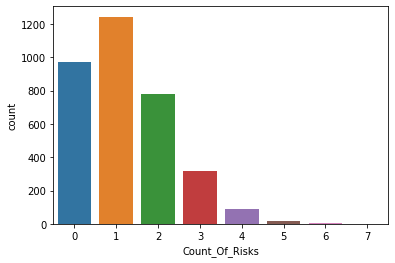

In [17]:
sbn.countplot(veri["Count_Of_Risks"])

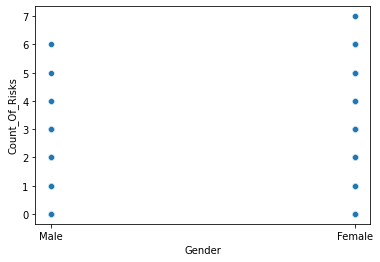

In [25]:
sbn.scatterplot(x="Gender",y="Count_Of_Risks",data=veri)

In [27]:
veri.sort_values("Count_Of_Risks",ascending = False).head()

Ptid Persistency_Flag  Gender              Race     Ethnicity   Region  \
1059  P1060   Non-Persistent  Female         Caucasian  Not Hispanic    South   
817    P818       Persistent  Female  African American  Not Hispanic    South   
2601  P2602   Non-Persistent  Female         Caucasian  Not Hispanic     West   
3045  P3046       Persistent  Female     Other/Unknown       Unknown  Midwest   
342    P343       Persistent  Female         Caucasian  Not Hispanic    South   

     Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
1059      65-75  GENERAL PRACTITIONER              Others   
817       55-65  GENERAL PRACTITIONER              Others   
2601      65-75          RHEUMATOLOGY          Specialist   
3045      55-65          RHEUMATOLOGY          Specialist   
342         >75         ENDOCRINOLOGY          Specialist   

          Ntm_Speciality_Bucket  ... Risk_Family_History_Of_Osteoporosis  \
1059  OB/GYN/Others/PCP/Unknown  ...                                   N   
817   OB/GYN/Others/PCP/Unknown  ...                                   Y   
2601                      Rheum  ...                                   N   
3045                      Rheum  ...                                   Y   
342                Endo/Onc/Uro  ...                                   Y   

     Risk_Low_Calcium_Intake  Risk_Vitamin_D_Insufficiency  \
1059                       N                             Y   
817                        N                             Y   
2601                       N                             Y   
3045                       N                             Y   
342                        N                             Y   

     Risk_Poor_Health_Frailty Risk_Excessive_Thinness  \
1059                        Y                       Y   
817                         Y                       N   
2601                        Y                       Y   
3045                        N                       N   
342                         Y                       N   

     Risk_Hysterectomy_Oophorectomy Risk_Estrogen_Deficiency  \
1059                              N                        N   
817                               N                        N   
2601                              N                        N   
3045                              N                        N   
342                               N                        N   

     Risk_Immobilization Risk_Recurring_Falls Count_Of_Risks  
1059                   N                    Y              7  
817                    N                    N              7  
2601                   N                    Y              6  
3045                   N                    N              6  
342                    N                    N              6  

[5 rows x 69 columns]

In [28]:
len(veri) * 0.01

34.24

In [29]:
yuzdeDoksanDokuzDf = veri.sort_values("Count_Of_Risks",ascending = False).iloc[34:]

In [30]:
yuzdeDoksanDokuzDf.describe()

Dexa_Freq_During_Rx  Count_Of_Risks
count          3390.000000     3390.000000
mean              3.020944        1.202065
std               8.165475        1.030744
min               0.000000        0.000000
25%               0.000000        0.000000
50%               0.000000        1.000000
75%               3.000000        2.000000
max             146.000000        4.000000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


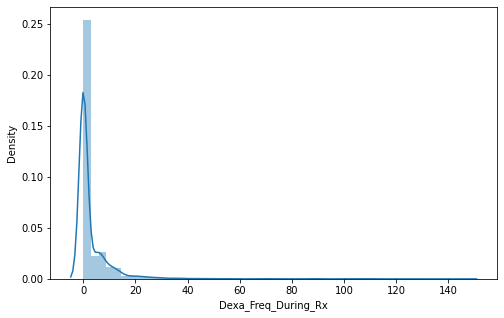

In [39]:
plt.figure(figsize=(8,5))
sbn.distplot(yuzdeDoksanDokuzDf["Dexa_Freq_During_Rx"])

In [41]:
yuzdeDoksanDokuzDf.groupby("Dexa_Freq_During_Rx").mean()["Count_Of_Risks"]

Dexa_Freq_During_Rx
0      1.159367
1      1.304348
2      1.250000
3      1.260870
4      1.294118
5      1.441441
6      1.310680
7      1.395604
8      1.239437
9      1.343750
10     1.636364
11     1.200000
12     1.529412
13     0.736842
14     1.157895
15     0.666667
16     1.285714
17     0.714286
18     1.142857
19     0.666667
20     1.428571
21     1.142857
22     1.538462
23     2.000000
24     1.200000
25     2.000000
26     1.100000
27     0.000000
28     1.428571
29     1.000000
30     1.428571
32     1.666667
33     2.000000
34     1.000000
35     3.000000
36     0.800000
37     1.000000
38     0.000000
39     1.500000
40     2.000000
42     3.000000
44     0.000000
45     2.000000
48     1.000000
50     0.000000
52     1.000000
54     2.000000
58     1.500000
66     0.000000
68     1.000000
69     1.000000
72     1.000000
81     0.000000
88     0.000000
108    2.000000
110    0.000000
118    1.000000
146    1.000000
Name: Count_Of_Risks, dtype: float64

In [40]:
veri.groupby("Dexa_Freq_During_Rx").mean()["Count_Of_Risks"]

Dexa_Freq_During_Rx
0      1.192524
1      1.500000
2      1.250000
3      1.260870
4      1.294118
5      1.552632
6      1.448598
7      1.462366
8      1.239437
9      1.343750
10     1.636364
11     1.200000
12     1.596154
13     0.736842
14     1.157895
15     0.666667
16     1.285714
17     0.714286
18     1.142857
19     0.666667
20     1.600000
21     1.142857
22     1.538462
23     2.000000
24     1.200000
25     2.000000
26     1.100000
27     0.000000
28     1.428571
29     1.000000
30     1.428571
32     1.666667
33     2.000000
34     1.000000
35     3.000000
36     0.800000
37     1.000000
38     0.000000
39     1.500000
40     2.000000
42     3.000000
44     0.000000
45     2.000000
48     1.000000
50     0.000000
52     1.000000
54     2.000000
58     1.500000
66     0.000000
68     1.000000
69     1.000000
72     1.000000
81     0.000000
88     0.000000
108    2.000000
110    0.000000
118    1.000000
146    1.000000
Name: Count_Of_Risks, dtype: float64

In [33]:
mat = pd.DataFrame(
    [ veri[f].value_counts() for f in list(kendi_ozeligi) ],
    index=list(kendi_ozeligi)
    ).stack()
pd.DataFrame(mat.values, index=mat.index)

0
Ntm_Speciality_Bucket                   OB/GYN/Others/PCP/Unknown  2104.0
                                        Endo/Onc/Uro                716.0
                                        Rheum                       604.0
Frag_Frac_Prior_Ntm                     N                          2872.0
                                        Y                           552.0
...                                                                   ...
Risk_Type_1_Insulin_Dependent_Diabetes  Y                           139.0
Comorb_Gastro_esophageal_reflux_disease N                          2794.0
                                        Y                           630.0
Concom_Macrolides_And_Similar_Types     N                          2853.0
                                        Y                           571.0

[3605 rows x 1 columns]

In [42]:
level_substitution = {}

def levels2index(levels):
    dct = {}
    for i in range(len(levels)):
        dct[levels[i]] = i
    return dct

df_num = veri.copy()

for c in kendi_ozeligi:
    level_substitution[c] = levels2index(veri[c].unique())
    df_num[c].replace(level_substitution[c], inplace=True)

df_num

Ptid  Persistency_Flag  Gender  Race  Ethnicity  Region  Age_Bucket  \
0        0                 0       0     0          0       0           0   
1        1                 1       0     1          0       0           1   
2        2                 1       1     2          1       1           2   
3        3                 1       1     0          0       1           0   
4        4                 1       1     0          0       1           0   
...    ...               ...     ...   ...        ...     ...         ...   
3419  3419                 0       1     0          0       2           0   
3420  3420                 0       1     0          0       2           0   
3421  3421                 0       1     0          0       2           0   
3422  3422                 1       1     0          0       2           1   
3423  3423                 1       1     0          0       2           2   

      Ntm_Speciality  Ntm_Specialist_Flag  Ntm_Speciality_Bucket  ...  \
0                  0                    0                      0  ...   
1                  0                    0                      0  ...   
2                  0                    0                      0  ...   
3                  0                    0                      0  ...   
4                  0                    0                      0  ...   
...              ...                  ...                    ...  ...   
3419               0                    0                      0  ...   
3420               1                    0                      0  ...   
3421               2                    1                      1  ...   
3422               1                    0                      0  ...   
3423               1                    0                      0  ...   

      Risk_Family_History_Of_Osteoporosis  Risk_Low_Calcium_Intake  \
0                                       0                        0   
1                                       0                        0   
2                                       0                        1   
3                                       0                        0   
4                                       0                        0   
...                                   ...                      ...   
3419                                    0                        0   
3420                                    0                        0   
3421                                    0                        0   
3422                                    0                        0   
3423                                    0                        0   

      Risk_Vitamin_D_Insufficiency  Risk_Poor_Health_Frailty  \
0                                0                         0   
1                                0                         0   
2                                0                         0   
3                                0                         0   
4                                0                         0   
...                            ...                       ...   
3419                             1                         0   
3420                             0                         0   
3421                             1                         0   
3422                             0                         0   
3423                             1                         0   

      Risk_Excessive_Thinness  Risk_Hysterectomy_Oophorectomy  \
0                           0                               0   
1                           0                               0   
2                           0                               0   
3                           0                               0   
4                           0                               0   
...                       ...                             ...   
3419                        0                               0   
3420                        0                               0   
3421     

In [43]:
level_substitution

{'Ntm_Speciality_Bucket': {'OB/GYN/Others/PCP/Unknown': 0,
  'Endo/Onc/Uro': 1,
  'Rheum': 2},
 'Frag_Frac_Prior_Ntm': {'N': 0, 'Y': 1},
 'Concom_Anti_Depressants_And_Mood_Stabilisers': {'N': 0, 'Y': 1},
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure': {'N': 0, 'Y': 1},
 'Risk_Excessive_Thinness': {'N': 0, 'Y': 1},
 'Ethnicity': {'Not Hispanic': 0, 'Hispanic': 1, 'Unknown': 2},
 'Comorb_Personal_history_of_malignant_neoplasm': {'N': 0, 'Y': 1},
 'Adherent_Flag': {'Adherent': 0, 'Non-Adherent': 1},
 'Concom_Viral_Vaccines': {'N': 0, 'Y': 1},
 'Risk_Immobilization': {'N': 0, 'Y': 1},
 'Ntm_Speciality': {'GENERAL PRACTITIONER': 0,
  'Unknown': 1,
  'ENDOCRINOLOGY': 2,
  'RHEUMATOLOGY': 3,
  'ONCOLOGY': 4,
  'PATHOLOGY': 5,
  'OBSTETRICS AND GYNECOLOGY': 6,
  'PSYCHIATRY AND NEUROLOGY': 7,
  'ORTHOPEDIC SURGERY': 8,
  'PHYSICAL MEDICINE AND REHABILITATION': 9,
  'SURGERY AND SURGICAL SPECIALTIES': 10,
  'PEDIATRICS': 11,
  'PULMONARY MEDICINE': 12,
  'HEMATOLOGY & ONCOLOGY': 13,
  

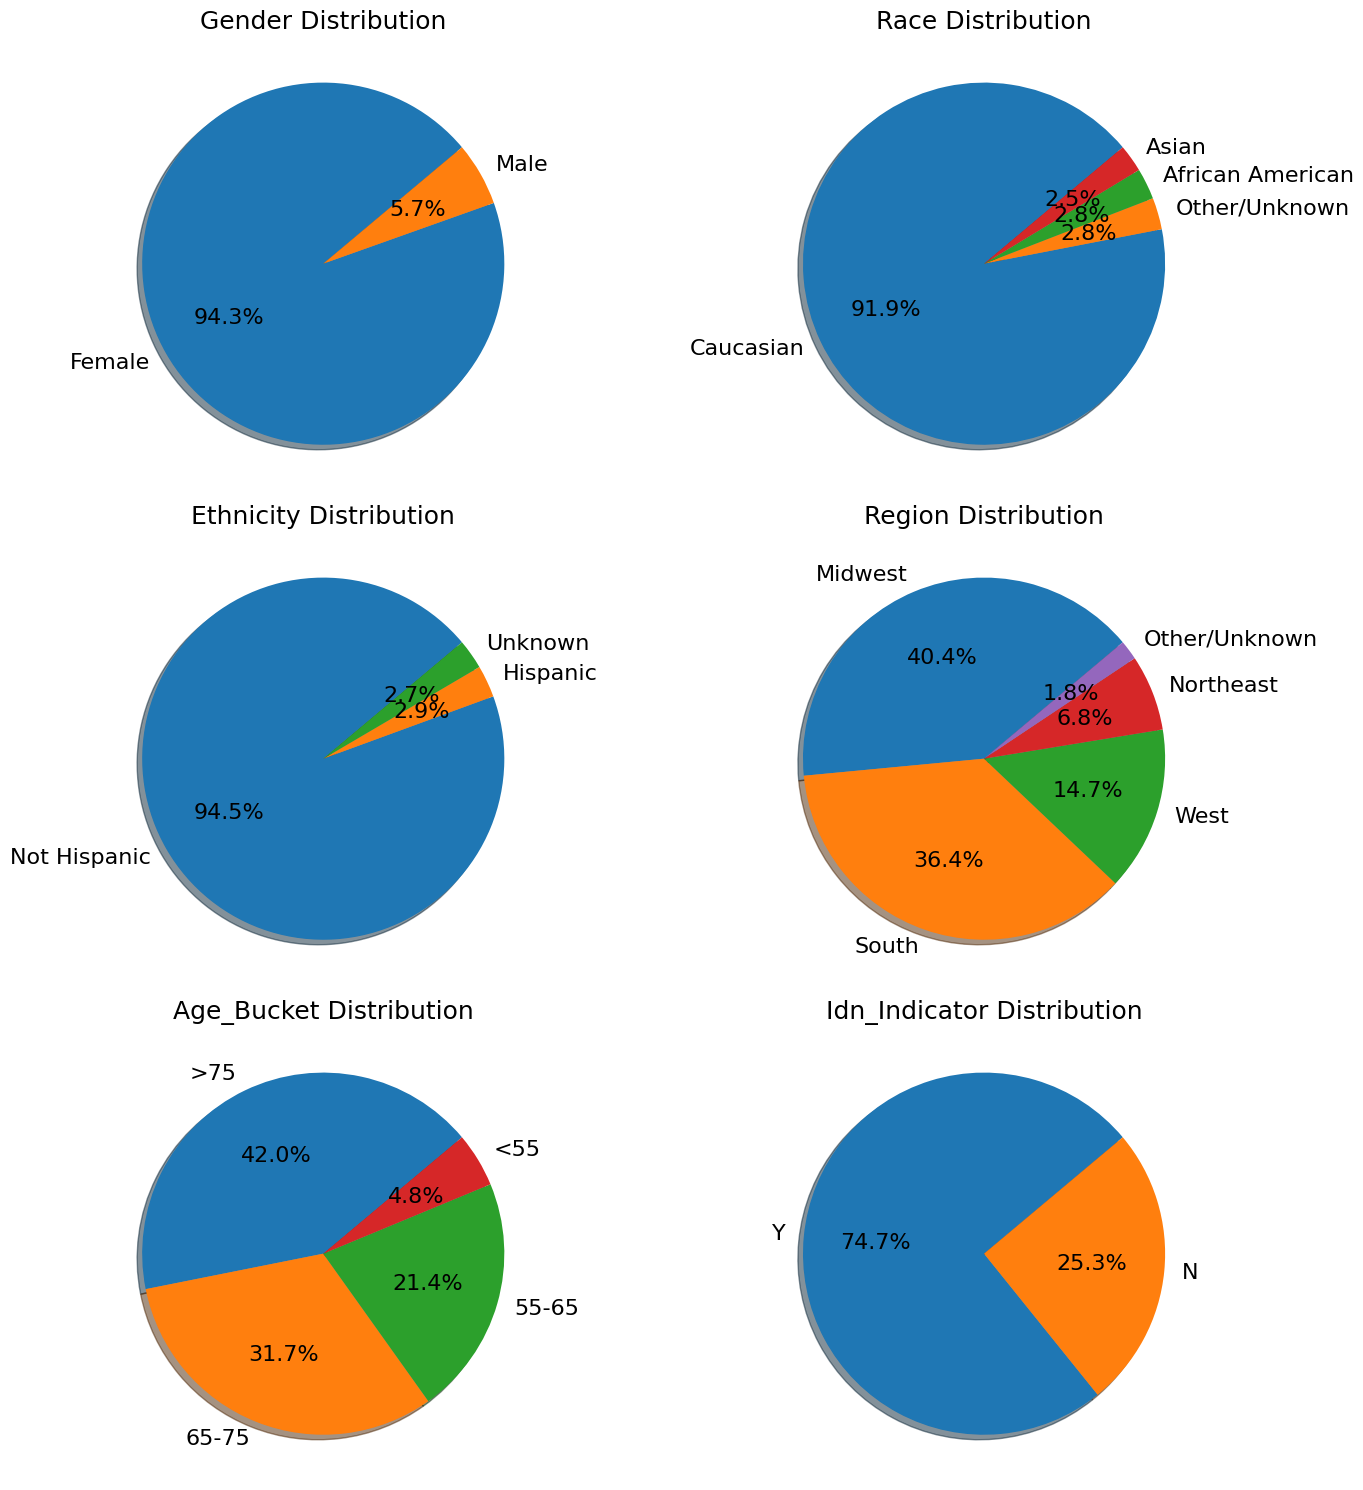

In [44]:
veri_ozelikleri = ['Gender', 'Race', 'Ethnicity', 'Region','Age_Bucket','Idn_Indicator']
index_decoder = {0: (0,0), 1: (0,1), 2: (1,0), 3: (1,1), 4: (2,0), 5: (2,1)}
fig, ax = plt.subplots(3,2, figsize=(15, 15), dpi=100)

for index, veri_ozellikleri in enumerate(veri_ozelikleri):
  i,j = index_decoder[index]
  var = veri[veri_ozellikleri].value_counts()
  labels = var.index
  ax[i,j].pie(x = var, labels=labels, autopct='%1.1f%%',shadow=True, startangle=40, textprops={'fontsize': 16})
  ax[i,j].set_title(veri_ozellikleri + ' Distribution', fontsize = 18)

fig.tight_layout()
plt.show()

Text(0.5, 0.98, 'Distribution of Numeric Values')

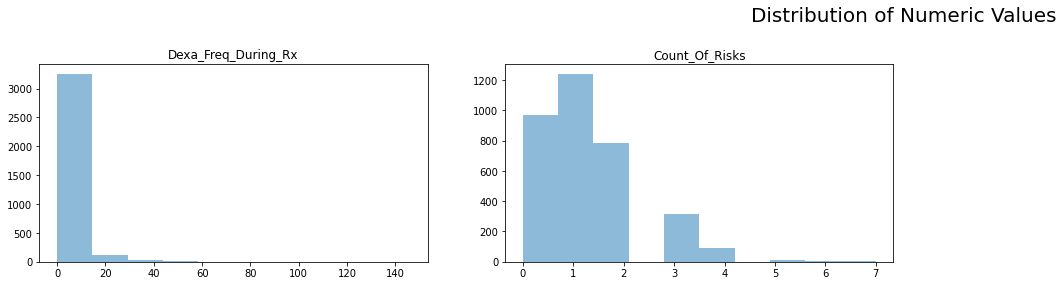

In [45]:
fig = plt.figure(figsize=(32, 8))
for i in range(len(matematiksel_veri)):

  f = list(matematiksel_veri)[i]
  plt.subplot(2, 4, i+1)
  hst = plt.hist(veri[f], alpha=0.5)
  plt.title(f)
plt.suptitle('Distribution of Numeric Values', fontsize=20)

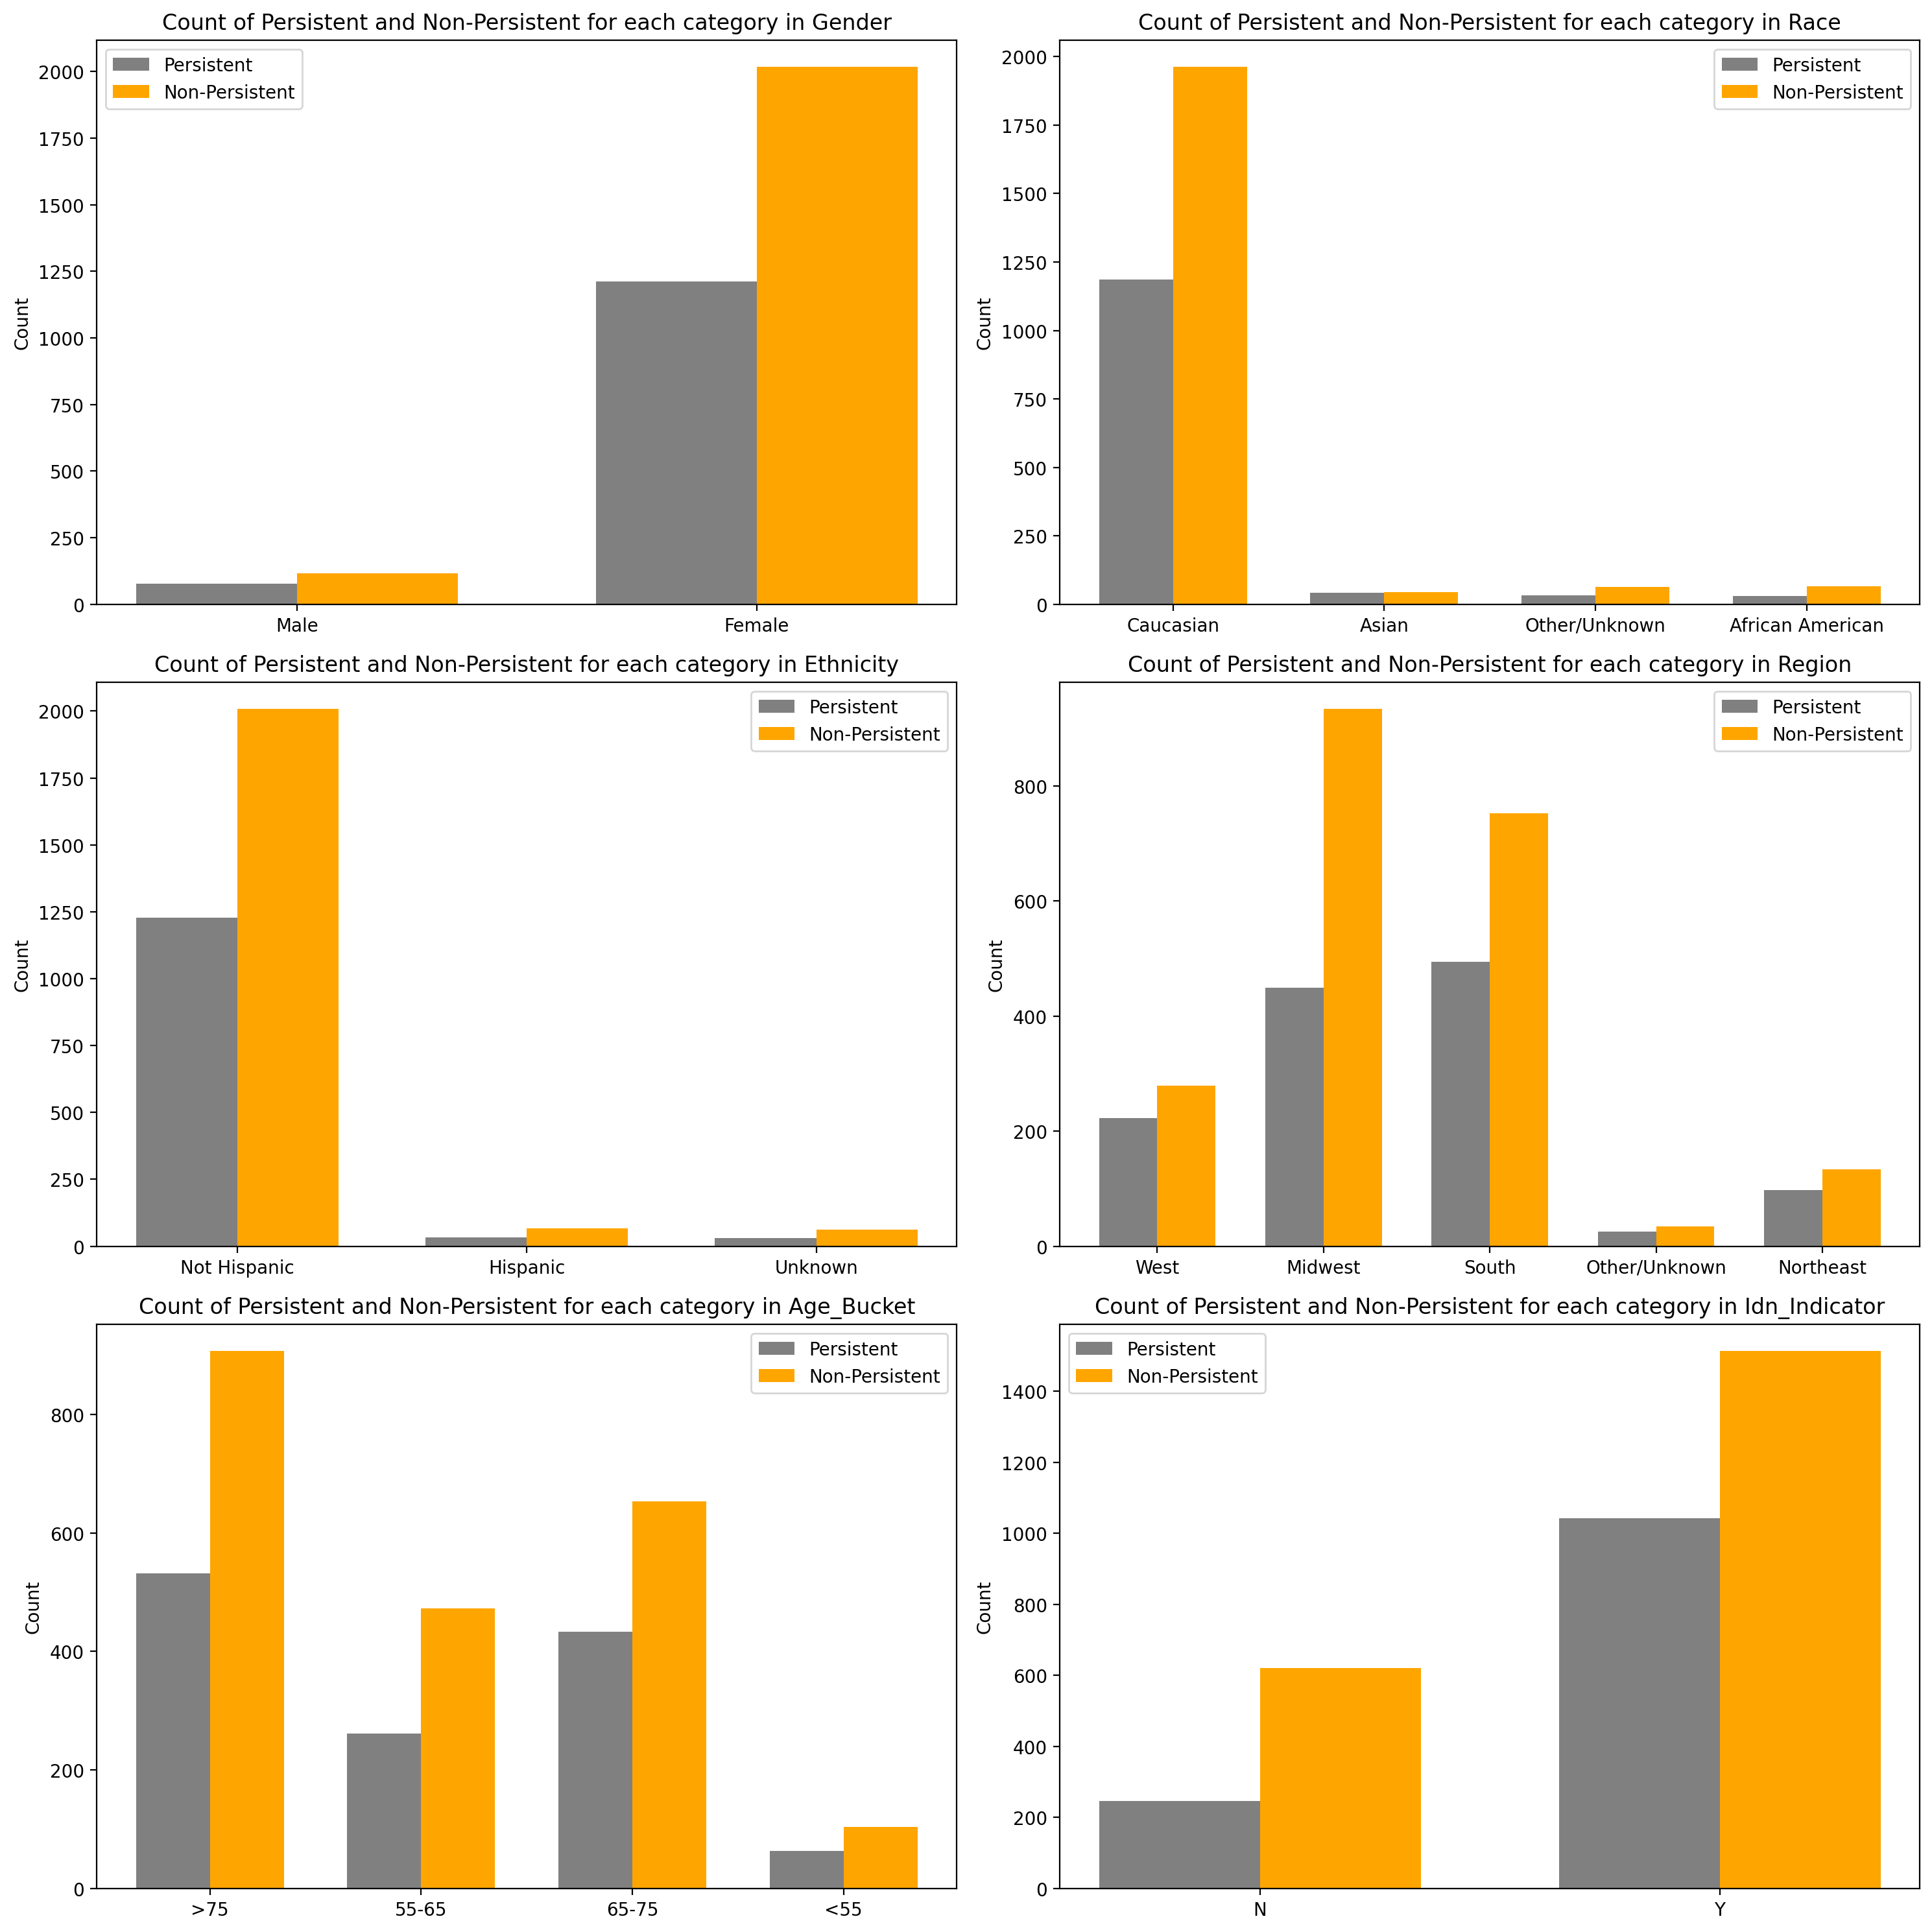

In [46]:
veri_ozelikleri = ['Gender', 'Race', 'Ethnicity', 'Region','Age_Bucket','Idn_Indicator']

index_decoder = {0: (0,0), 1: (0,1), 2: (1,0), 3: (1,1), 4: (2,0), 5: (2,1),}
fig, ax = plt.subplots(3,2, figsize=(15, 15), dpi=200)

for index, veri_ozellikleri in enumerate(veri_ozelikleri):
    labels = veri[veri_ozellikleri].unique()
    x = np.arange(len(labels))
    p = []
    nonp = []
    width = 0.35 
    i, j = index_decoder[index]
    for l in labels:
        values = veri[veri[veri_ozellikleri] == l]['Persistency_Flag'].value_counts(ascending=True)
        p.append(values['Persistent'])
        nonp.append(values['Non-Persistent'])
    rects1 = ax[i,j].bar(x - width/2, p, width, label='Persistent', color='gray')
    rects2 = ax[i,j].bar(x + width/2, nonp, width, label='Non-Persistent', color='orange')
    ax[i,j].set_ylabel('Count')
    ax[i,j].set_title('0')
    ax[i,j].set_title('Count of Persistent and Non-Persistent for each category in ' + veri_ozellikleri)
    ax[i,j].set_xticks(x)
    ax[i,j].set_xticklabels(labels)
    ax[i,j].legend()
    fig.tight_layout()
plt.show()

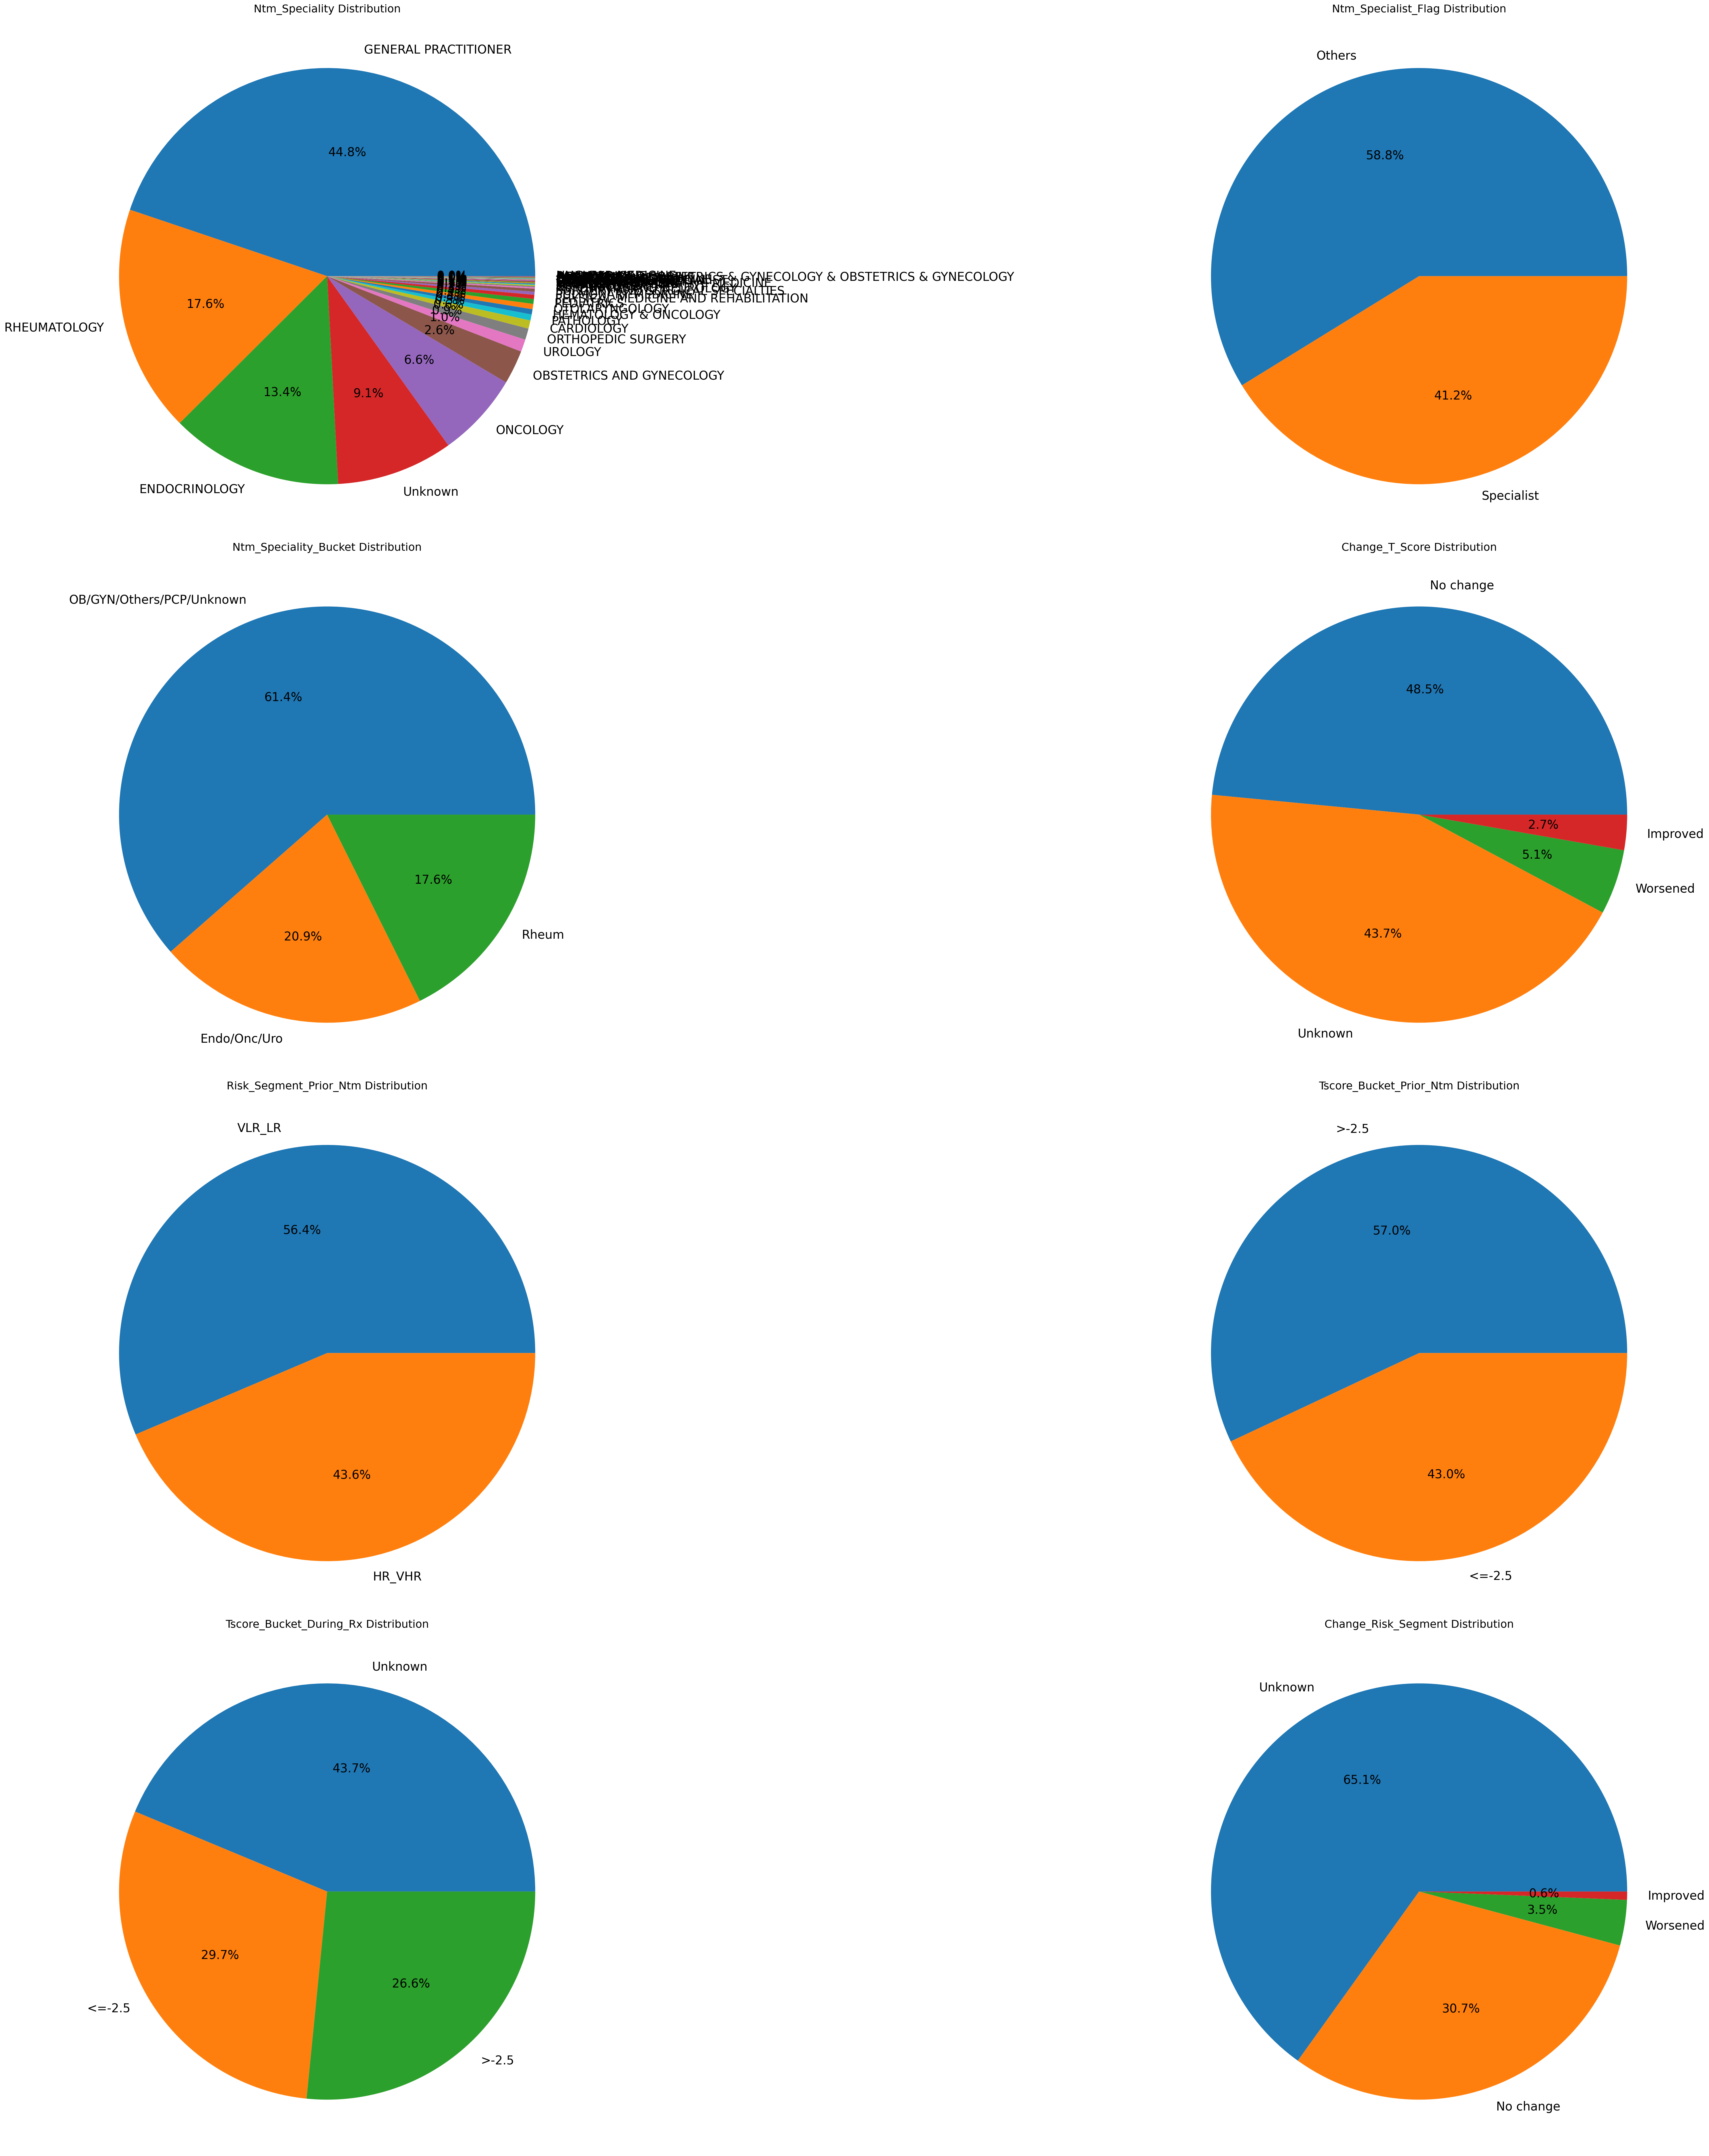

In [47]:
# data visualization using pie charts
saglayıcı_ozelikleri = ['Ntm_Speciality', 'Ntm_Specialist_Flag','Ntm_Speciality_Bucket','Change_T_Score','Risk_Segment_Prior_Ntm',
                     'Tscore_Bucket_Prior_Ntm','Tscore_Bucket_During_Rx','Change_Risk_Segment']

index_decoder = {0: (0,0), 1: (0,1), 2: (1,0), 3: (1,1), 4: (2,0), 5: (2,1),
                 6: (3,0), 7: (3,1), 8: (4,0)}
fig, ax = plt.subplots(4,2, figsize=(50, 50), dpi=150)

for index, saglayıcı_ozellikleri in enumerate(saglayıcı_ozelikleri):
  i,j = index_decoder[index]
  var = veri[saglayıcı_ozellikleri].value_counts()
  labels = var.index
  ax[i,j].pie(x = var, labels=labels, autopct='%1.1f%%',  textprops={'fontsize': 20})
  ax[i,j].set_title(saglayıcı_ozellikleri + ' Distribution', fontsize = 18)

fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

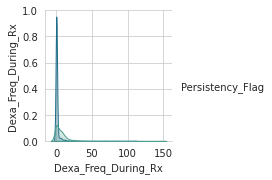

In [48]:
sbn.set_style("whitegrid")
plt.figure()
sbn.pairplot(veri[['Persistency_Flag','Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket', 'Dexa_Freq_During_Rx', 'Ntm_Speciality', 
       'Risk_Segment_Prior_Ntm', 'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx']], hue='Persistency_Flag', palette='crest')
plt.show()

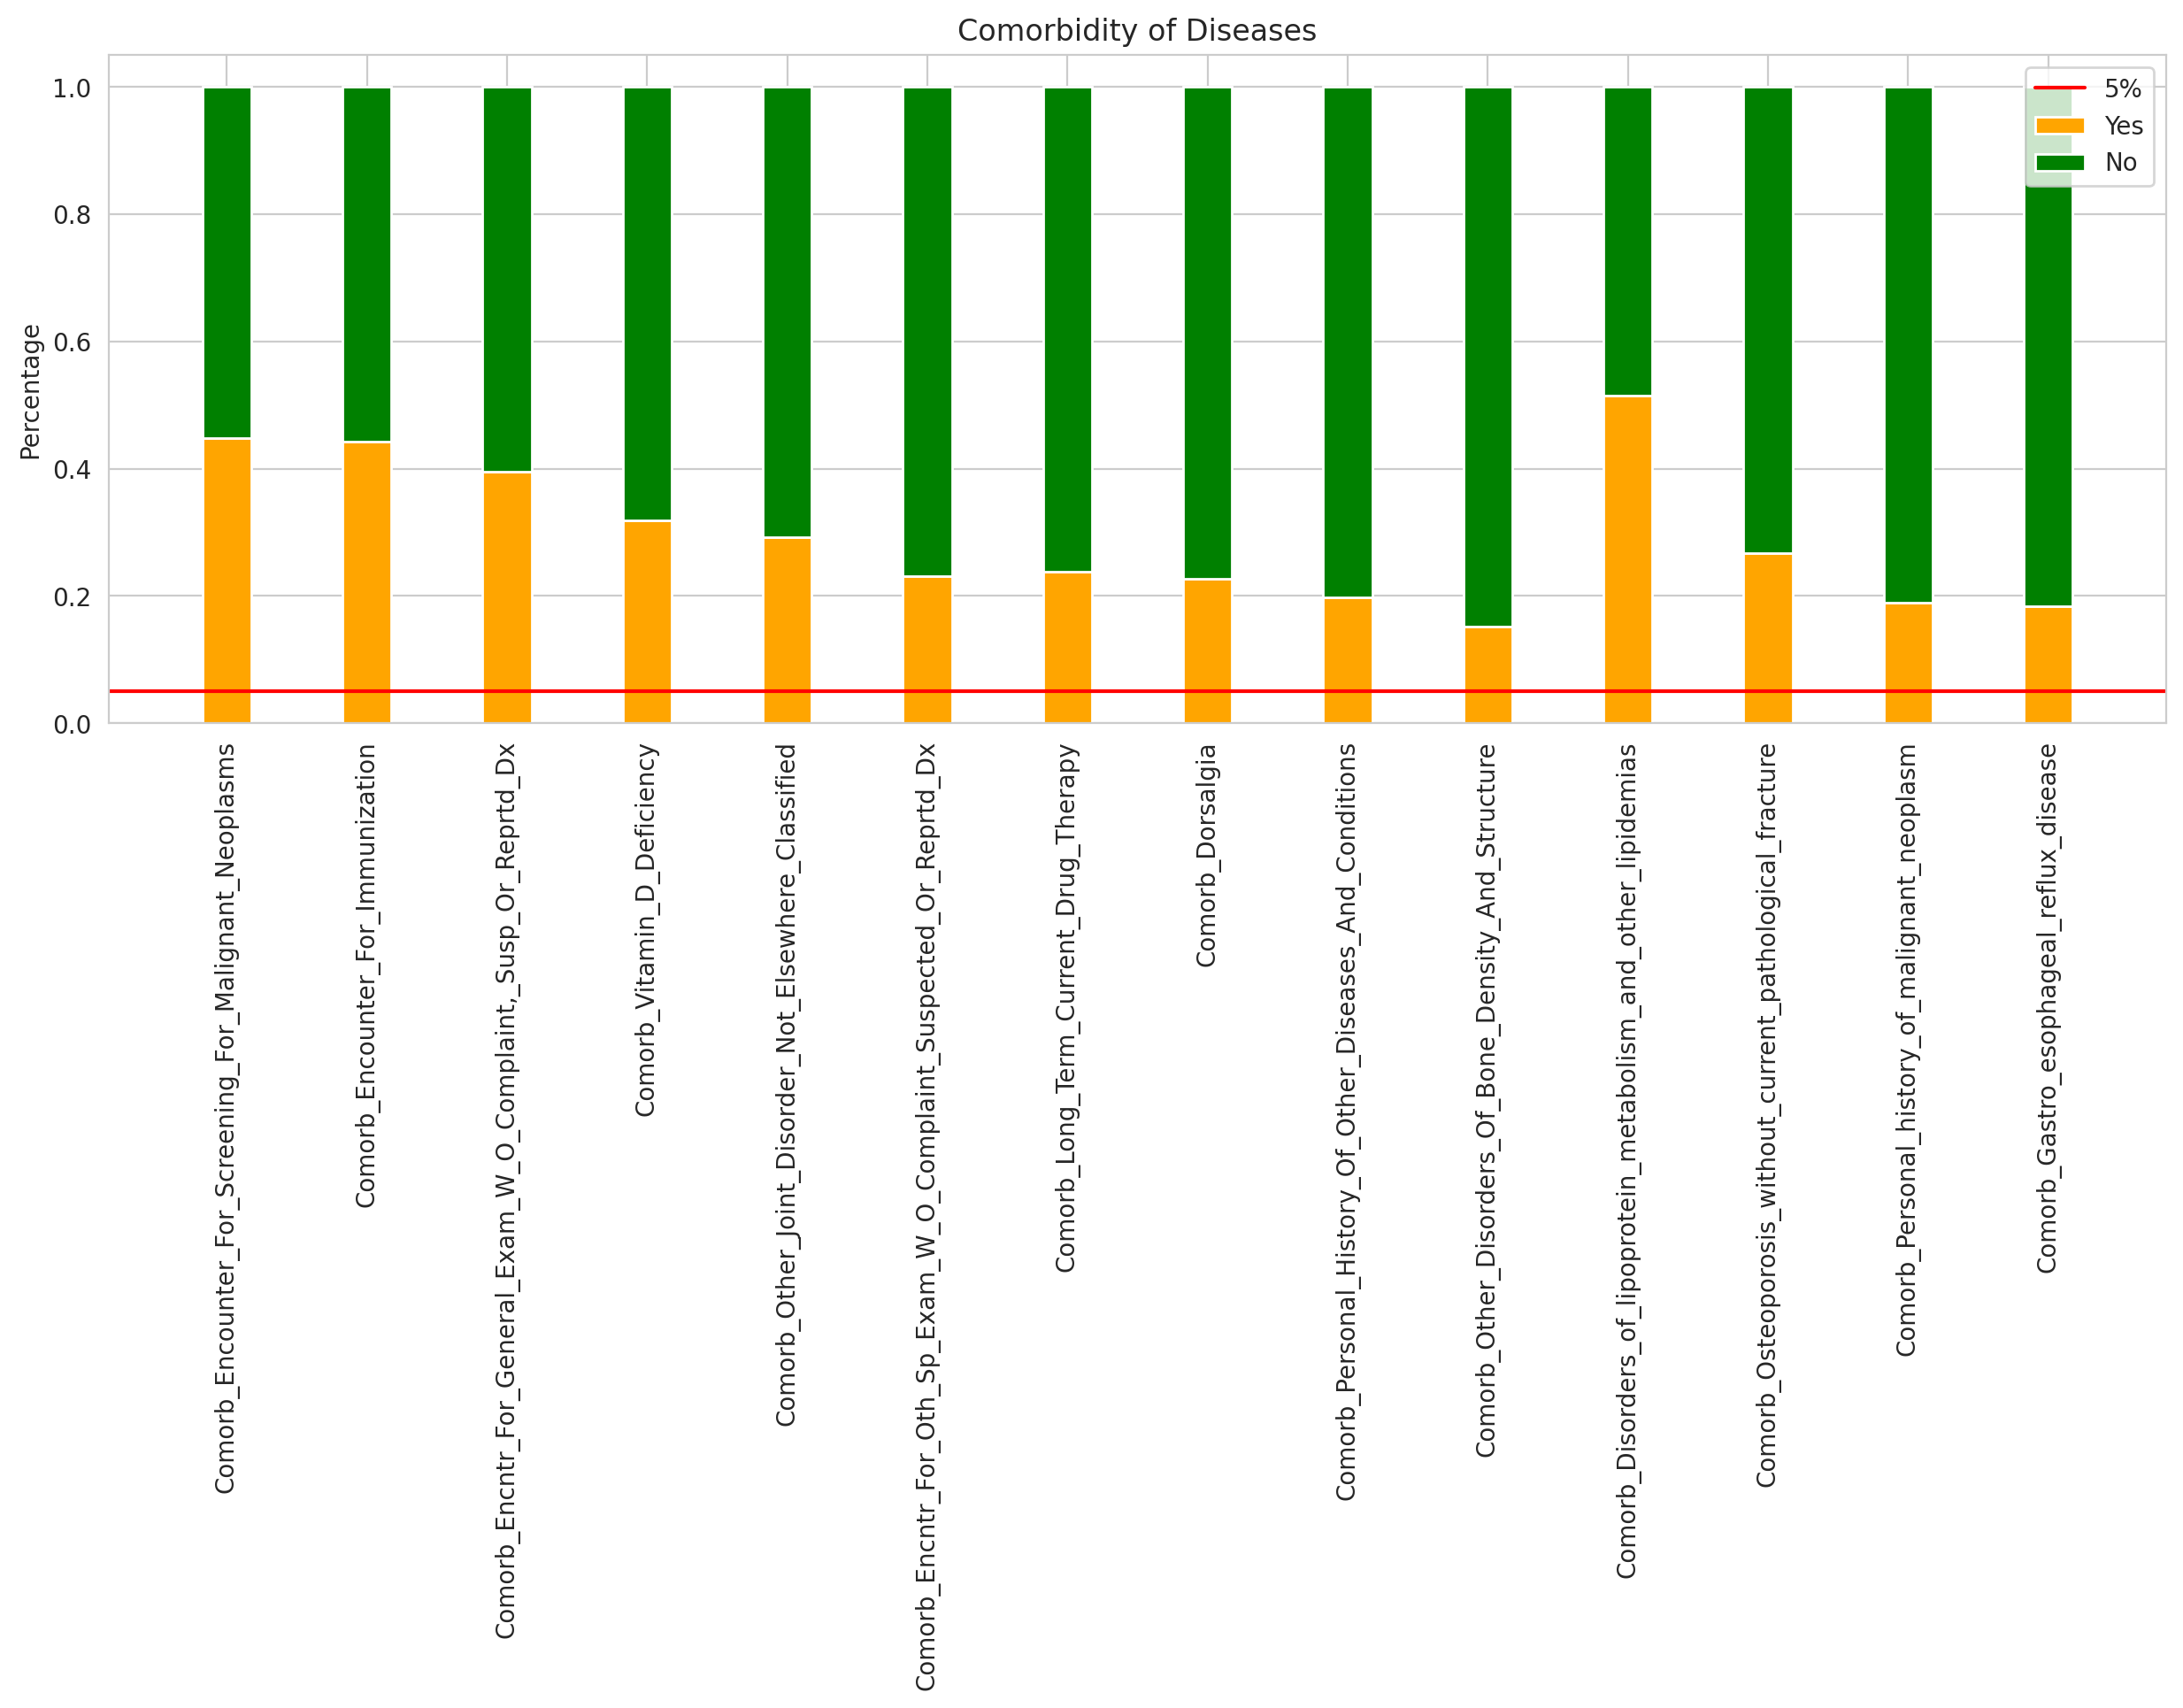

In [49]:
labels = [c for c in veri.columns if "Comorb" in c]
yes = []
no = []
width = 0.35 
for l in labels:
    yuzdeler = veri[l].value_counts(ascending=True)/ len(veri)
    yes.append(yuzdeler['Y'])
    no.append(yuzdeler['N'])

fig, ax = plt.subplots(figsize=(15,5), dpi=200)
ax.bar(labels, yes, width, label='Yes', color="orange")
ax.bar(labels, no, width, bottom=yes, label='No', color="green")
ax.axhline(y=0.05, color='red', label='5%')
ax.set_ylabel('Percentage')
ax.set_title('Comorbidity of Diseases')
ax.tick_params(axis='x', labelrotation = 90)
ax.legend()
plt.show()

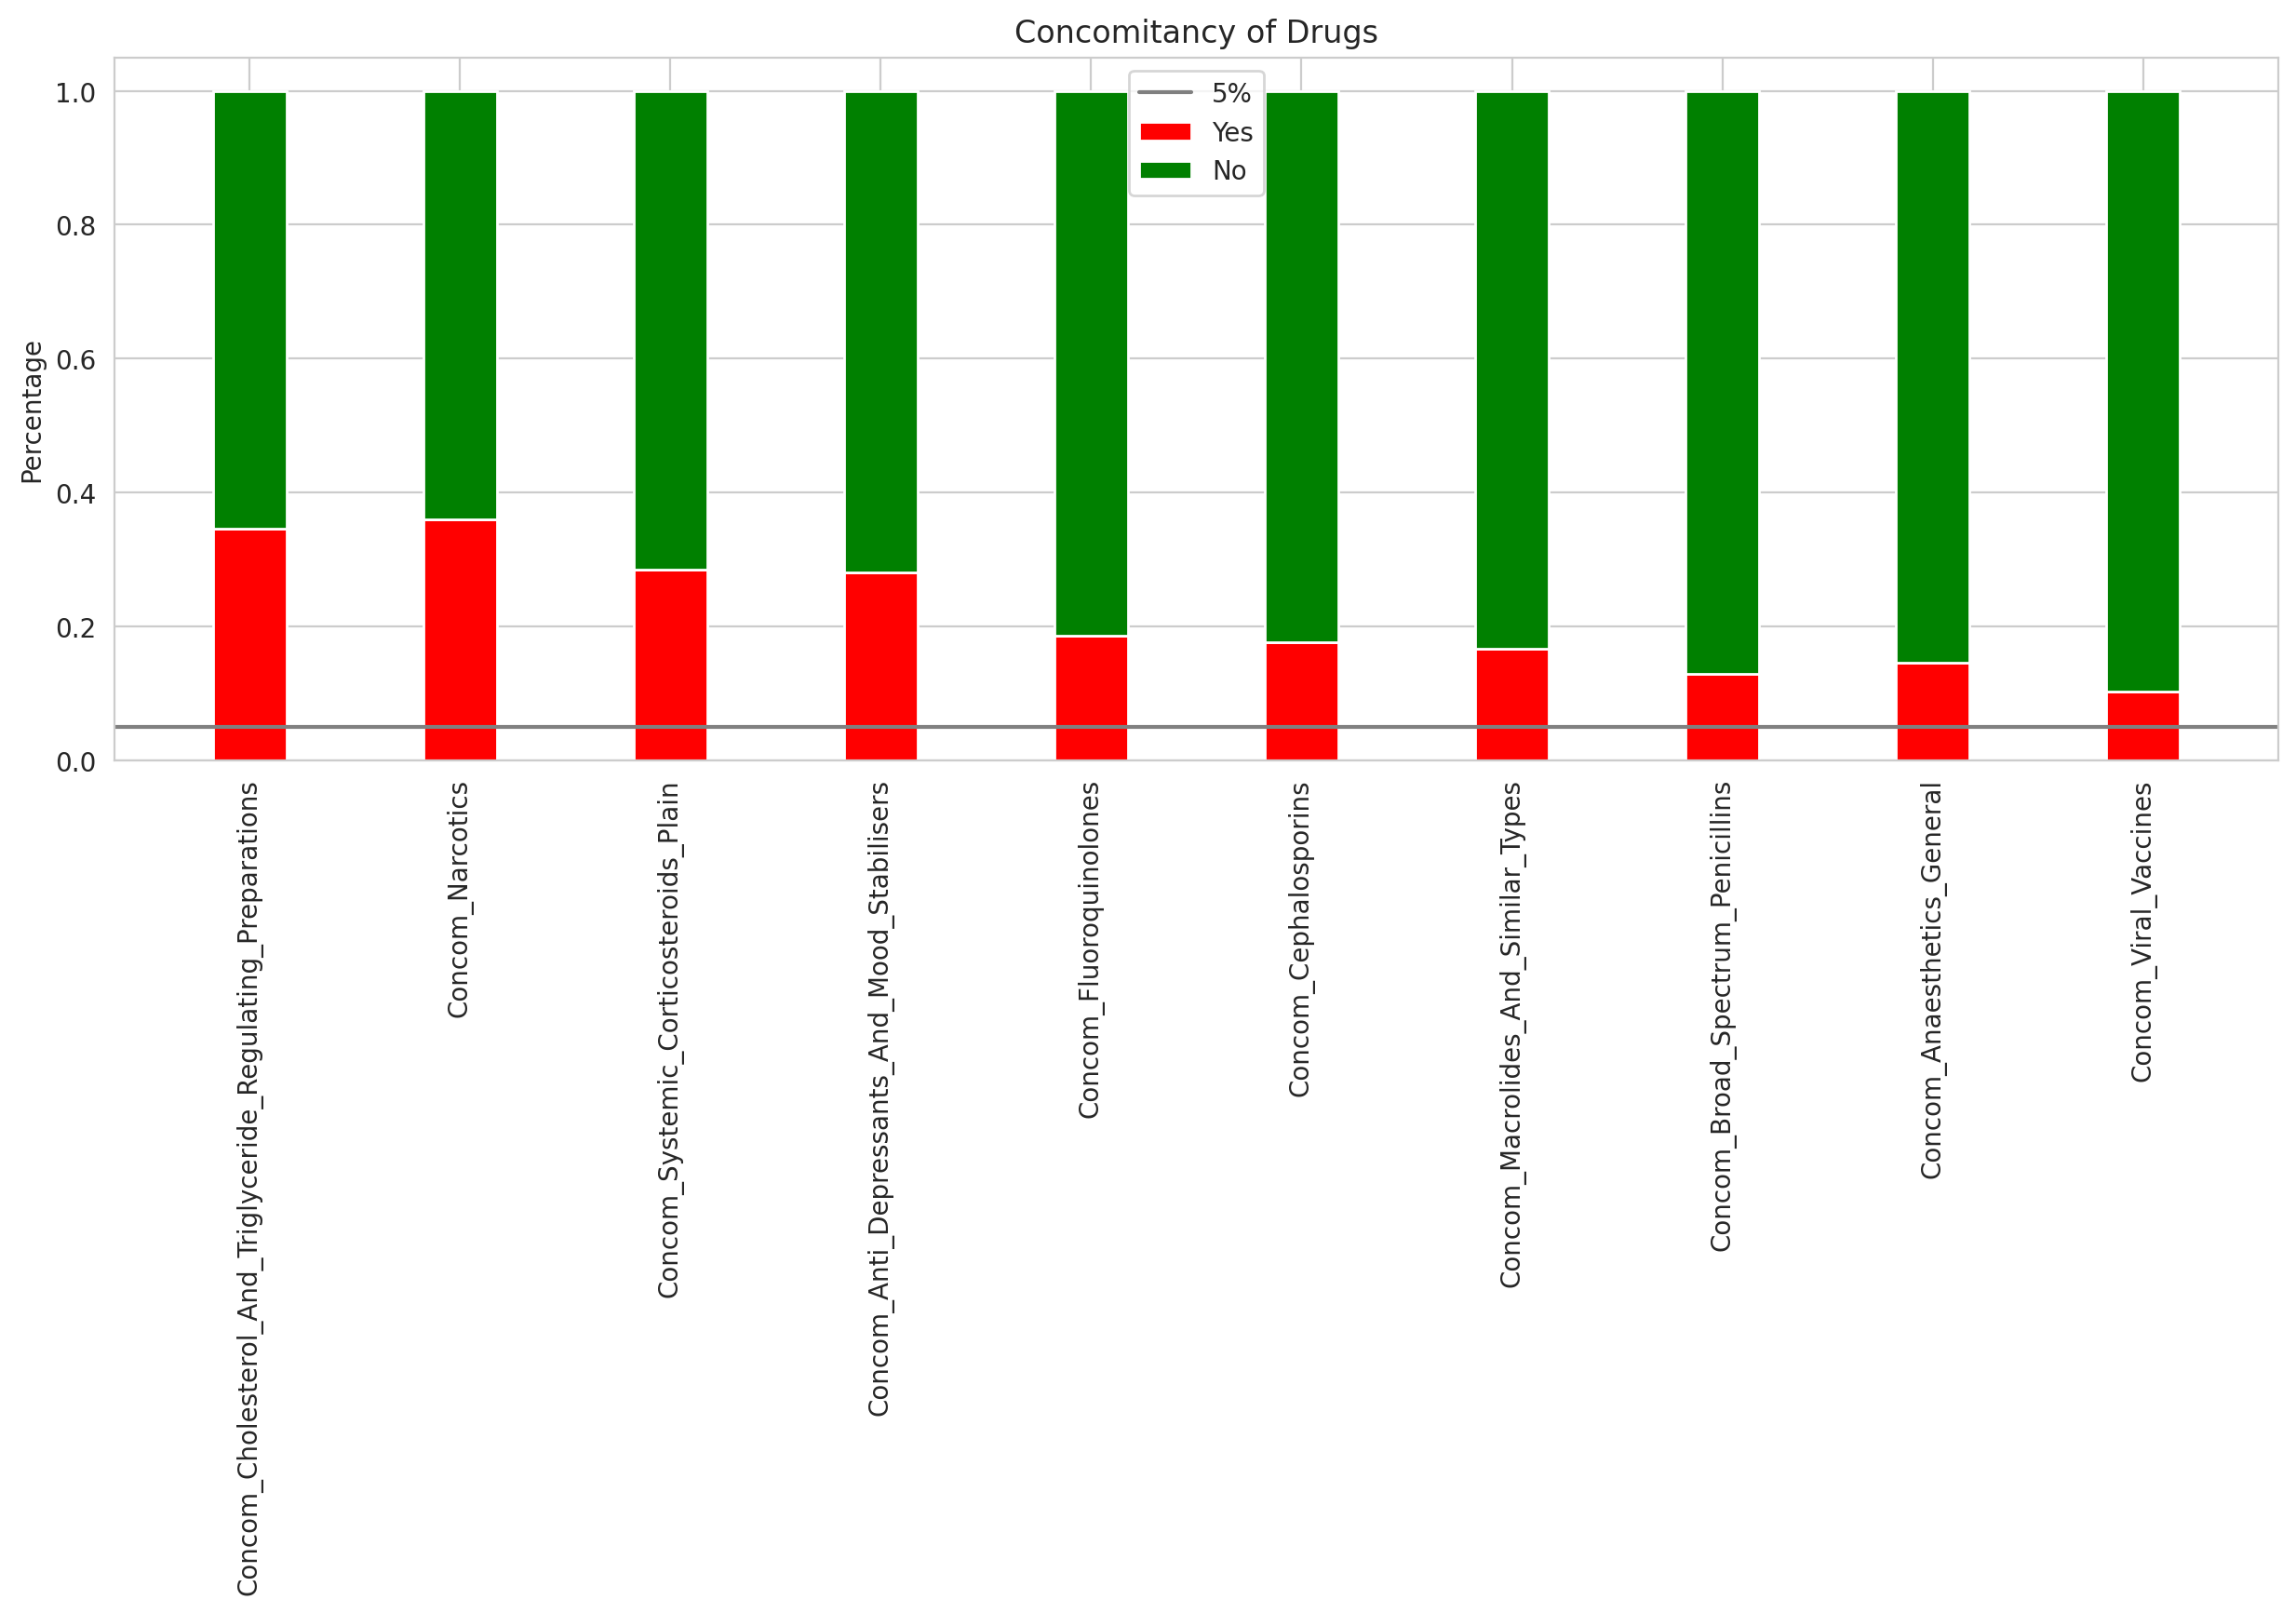

In [50]:
labels = [c for c in veri.columns if "Concom" in c]
yes = []
no = []
width = 0.35 
for l in labels:
    yuzdeler = veri[l].value_counts(ascending=True)/ len(veri)
    yes.append(yuzdeler['Y'])
    no.append(yuzdeler['N'])

fig, ax = plt.subplots(figsize=(15,5), dpi=200)
ax.bar(labels, yes, width, label='Yes', color='red')
ax.bar(labels, no, width, bottom=yes, label='No', color='green')
ax.axhline(y=0.05, color='gray', label='5%')
ax.set_ylabel('Percentage')
ax.set_title('Concomitancy of Drugs')
ax.tick_params(axis='x', labelrotation = 90)
ax.legend()
plt.show()

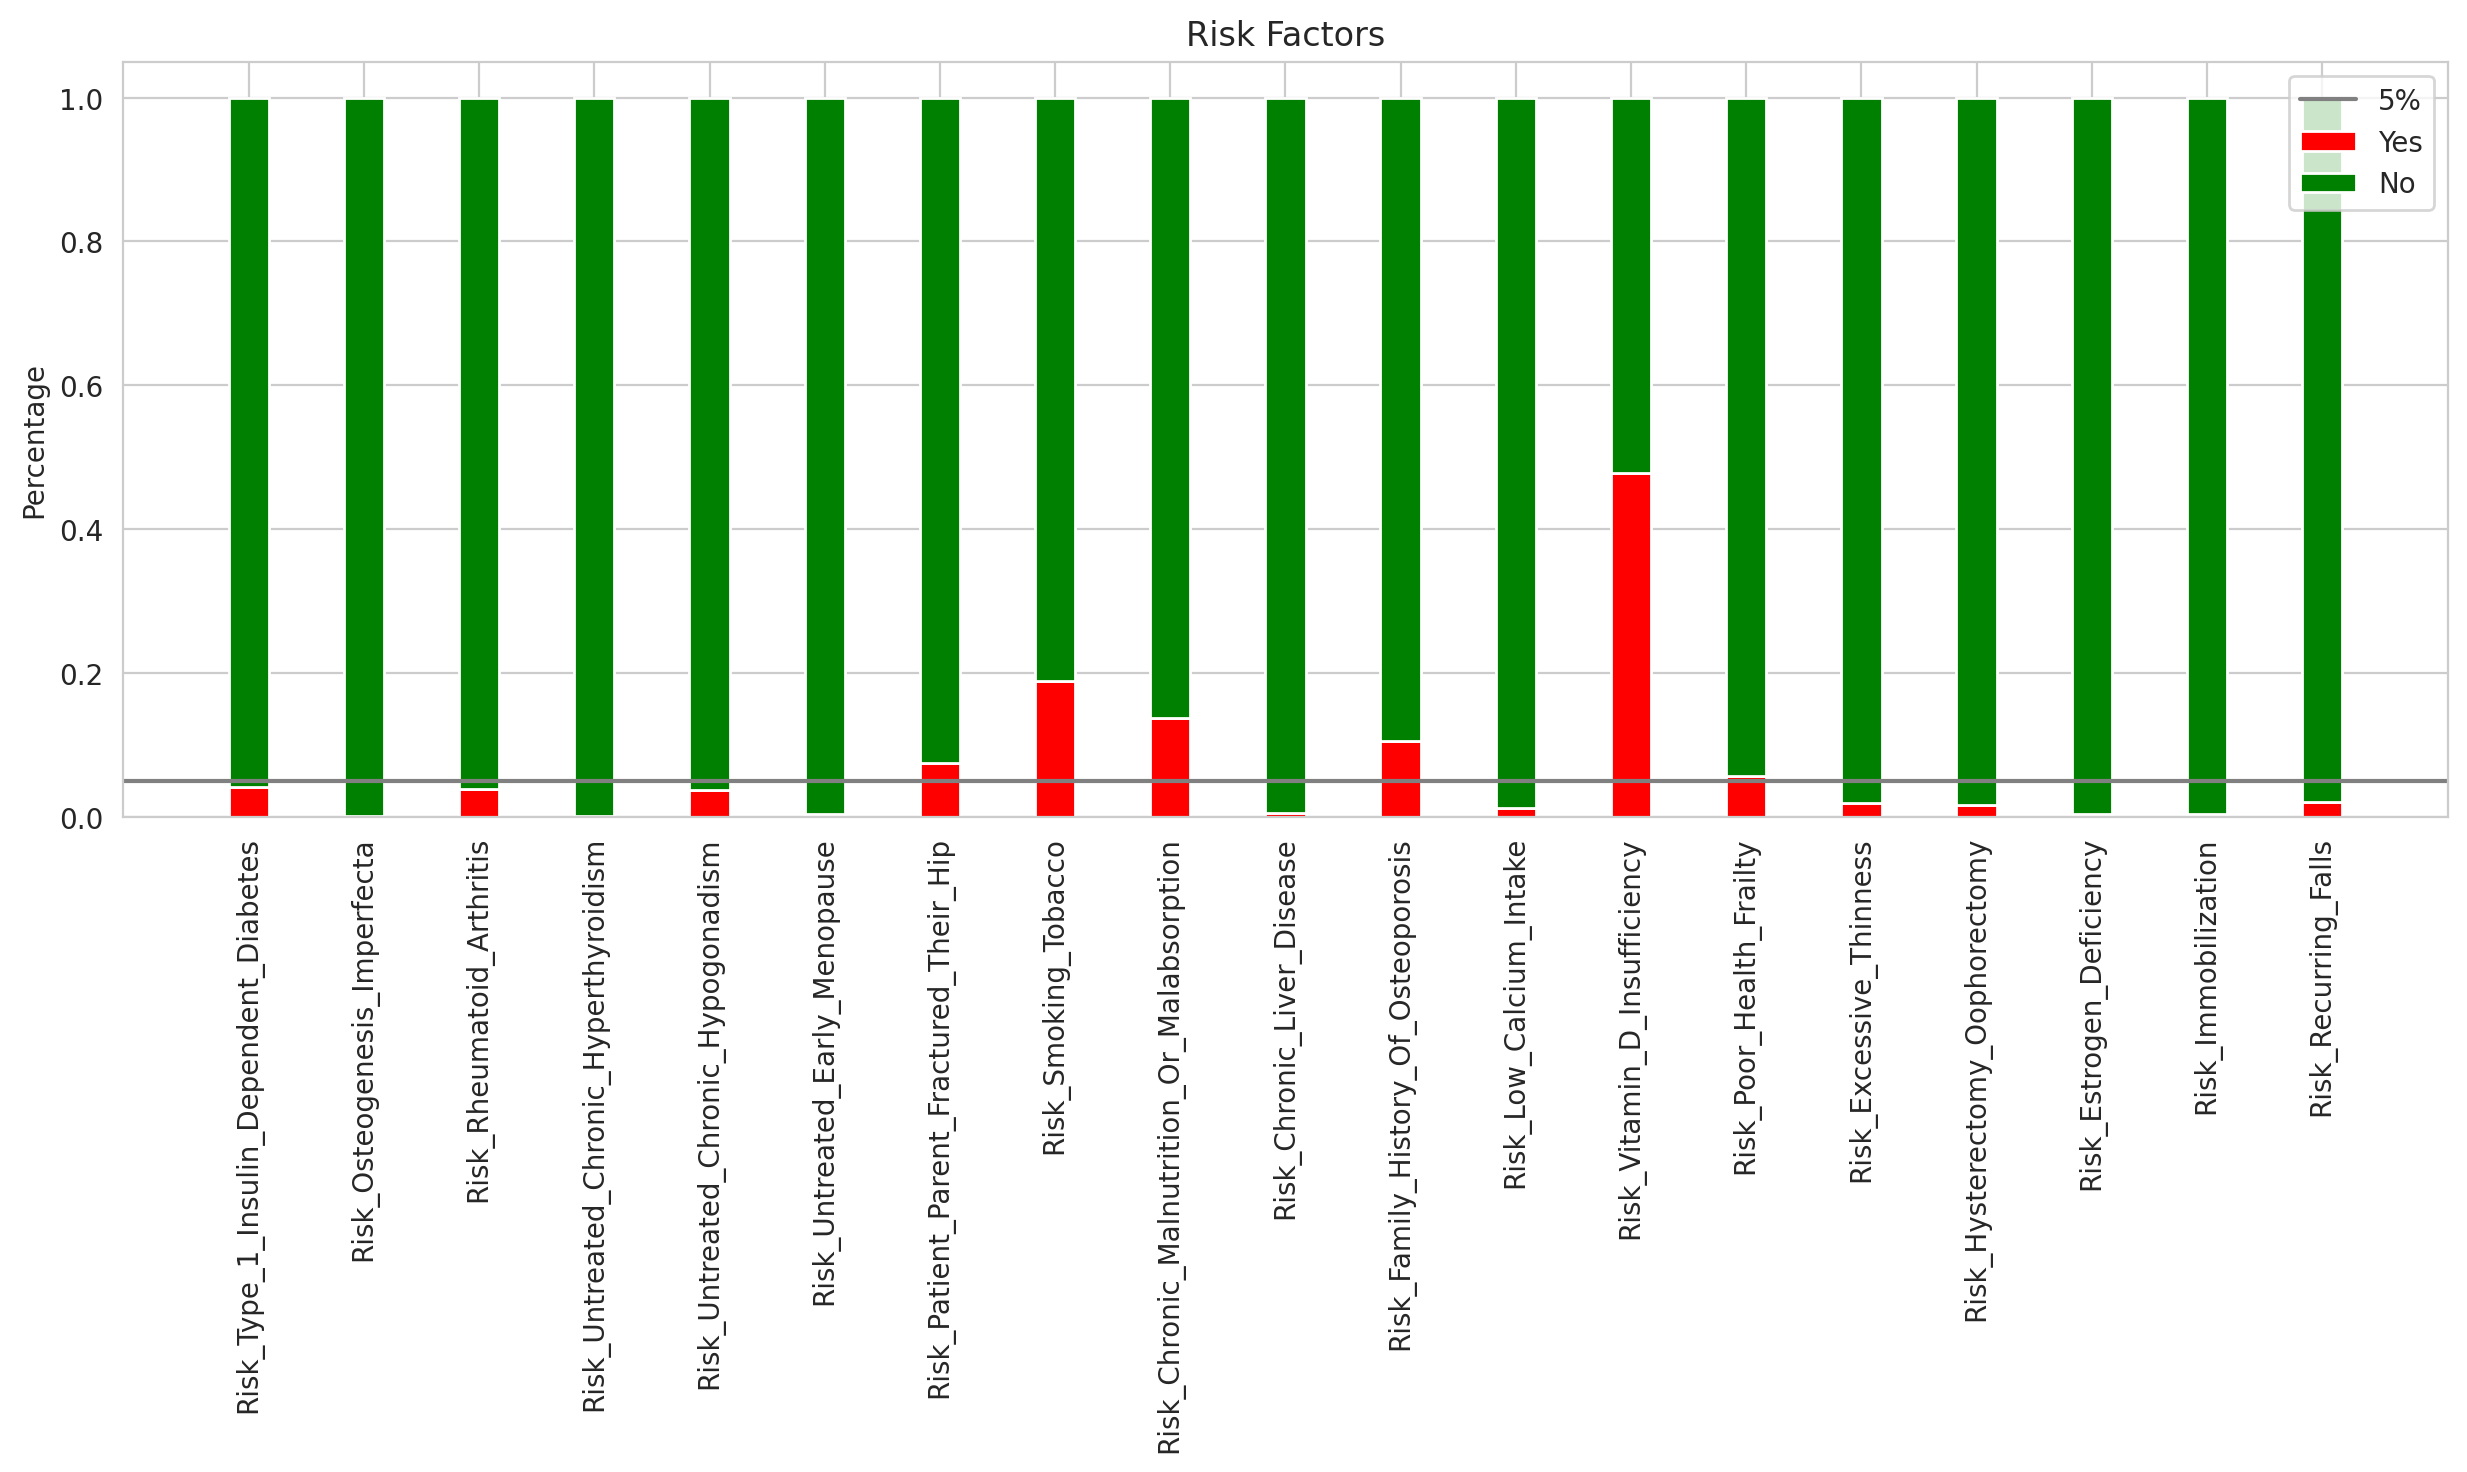

In [51]:
labels = [c for c in veri.iloc[:,49:68 ].columns if "Risk_" in c]

yes = []
no = []
width = 0.35 
for l in labels:
    yuzdeler = veri[l].value_counts(ascending=True)/ len(veri)
    yes.append(yuzdeler['Y'])
    no.append(yuzdeler['N'])

fig, ax = plt.subplots(figsize=(15,5), dpi=200)
ax.bar(labels, yes, width, label='Yes', color='red')
ax.bar(labels, no, width, bottom=yes, label='No', color='green')
ax.axhline(y=0.05, color='gray', label='5%')
ax.set_ylabel('Percentage')
ax.set_title('Risk Factors')
ax.tick_params(axis='x', labelrotation = 90)
ax.legend()
plt.show()

In [82]:
fig = px.histogram(veri, x="Dexa_Freq_During_Rx", marginal="box", hover_data=veri.columns)
fig.show()

In [53]:
fig = px.histogram(veri, x="Count_Of_Risks", marginal="box", hover_data=veri.columns)
fig.show()

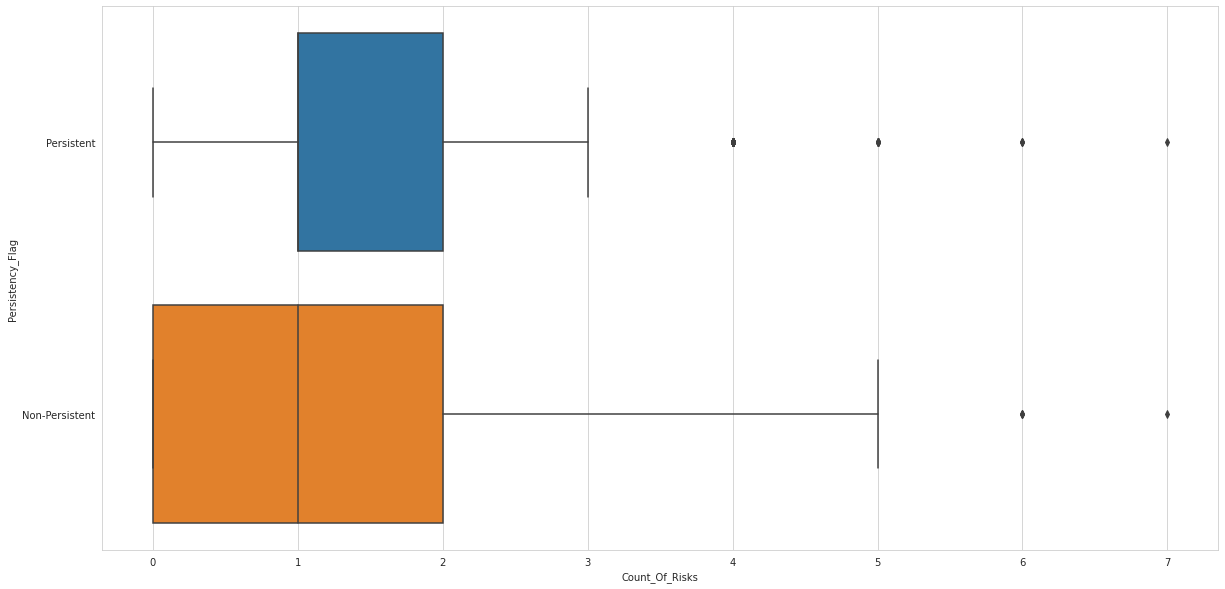

In [56]:
plt.figure(figsize=(20,10))
var ="Count_Of_Risks"
sbn.boxplot(x=var,y ="Persistency_Flag", data=veri)

In [57]:
print("Count of risks skewness(Risklerin çarpıklığı): ",veri["Count_Of_Risks"].skew())
print("Count of risks Kurtosis(Risklerin sayısı Kurtosis): ",veri["Count_Of_Risks"].kurt())



Count of risks skewness(Risklerin çarpıklığı):  0.8797905232898707
Count of risks Kurtosis(Risklerin sayısı Kurtosis):  0.9004859968892842


In [58]:
print("dexa_freq_during_rx skewness (dexa_freq_during_rx çarpıklığı): ",veri["Dexa_Freq_During_Rx"].skew())
print("dexa_freq_during_rx Kurtosis (dexa_freq_during_rx Kurtosis): ",veri["Dexa_Freq_During_Rx"].kurt())

dexa_freq_during_rx skewness (dexa_freq_during_rx çarpıklığı):  6.8087302112992285
dexa_freq_during_rx Kurtosis (dexa_freq_during_rx Kurtosis):  74.75837754795428


In [59]:
dexa_scaled = StandardScaler().fit_transform(veri['Dexa_Freq_During_Rx'][:,np.newaxis])
low_range = dexa_scaled[dexa_scaled[:,0].argsort()][:10]
high_range= dexa_scaled[dexa_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution(dağılımın dış aralığı (düşük)):')
print(low_range)
print('\nouter range (high) of the distributiondağılımın dış aralığı (yüksek):')
print(high_range)

outer range (low) of the distribution(dağılımın dış aralığı (düşük)):
[[-0.3707352]
 [-0.3707352]
 [-0.3707352]
 [-0.3707352]
 [-0.3707352]
 [-0.3707352]
 [-0.3707352]
 [-0.3707352]
 [-0.3707352]
 [-0.3707352]]

outer range (high) of the distributiondağılımın dış aralığı (yüksek):
[[ 7.98784109]
 [ 8.11076133]
 [ 8.47952205]
 [ 9.58580421]
 [10.44624589]
 [10.44624589]
 [12.90465068]
 [13.15049116]
 [14.13385307]
 [17.57561978]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [60]:
Q1 = np.percentile(veri['Dexa_Freq_During_Rx'], 25, 
                   interpolation = 'midpoint') 
Q3 = np.percentile(veri['Dexa_Freq_During_Rx'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1   
print("Old Shape(Eski Şekil): ", veri.shape) 
  
upper = np.where(veri['Dexa_Freq_During_Rx'] >= (Q3+1.5*IQR))
lower = np.where(veri['Dexa_Freq_During_Rx'] <= (Q1-1.5*IQR))

print("lower",lower[0])
print("Upper",upper[0])

veri.drop(upper[0], inplace = True)
veri.drop(lower[0], inplace = True)

print("New Shape(Yeni Şekil): ", veri.shape)
veri = veri.reset_index(drop=True)

Old Shape(Eski Şekil):  (3424, 69)
lower []
Upper [  32   33   62   65   89  101  110  116  164  180  186  194  198  201
  217  241  246  256  264  282  292  303  327  340  349  358  368  369
  373  378  382  390  415  417  426  433  448  457  462  464  480  495
  496  497  505  514  517  541  545  549  563  575  588  589  592  599
  603  605  613  640  646  651  653  656  657  678  684  688  700  705
  710  711  726  728  729  730  759  760  764  765  785  786  804  814
  823  834  847  849  864  870  873  885  909  915  925  926  930  937
  946  978  982  991  994 1006 1008 1016 1042 1061 1073 1074 1076 1113
 1118 1119 1128 1134 1141 1148 1151 1196 1240 1265 1267 1270 1272 1273
 1280 1283 1286 1291 1315 1359 1360 1363 1365 1370 1372 1396 1398 1404
 1448 1474 1513 1524 1533 1539 1546 1550 1554 1555 1564 1566 1570 1576
 1599 1628 1641 1642 1647 1654 1662 1671 1691 1703 1724 1732 1734 1746
 1752 1773 1782 1783 1788 1793 1803 1815 1826 1833 1834 1836 1838 1848
 1852 1854 1870 1876 1895 1

In [ ]:
Q1 = np.percentile(veri['Count_Of_Risks'], 25, 
                   interpolation = 'midpoint') 
Q3 = np.percentile(veri['Count_Of_Risks'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1   
print("Old Shape (Eski Şekil): ", veri.shape) 
  
upper = np.where(veri['Count_Of_Risks'] >= (Q3+1.5*IQR))
lower = np.where(veri['Count_Of_Risks'] <= (Q1-1.5*IQR))
  
print("lower",lower[0])
print("Upper",upper[0])

veri.drop(upper[0], inplace = True)
veri.drop(lower[0], inplace = True)

print("New Shape (Yeni Şekil): ", veri.shape) 
veri = veri.reset_index(drop=True)

Old Shape (Eski Şekil):  (2964, 69)
lower []
Upper [ 281  318  327  507  655  665  678  705  733  952 1001 1126 1590 1624
 1836 2227 2234 2450 2611 2702 2755 2888]
New Shape (Yeni Şekil):  (2942, 69)


In [61]:
veri.describe(include=['O'])

Ptid Persistency_Flag  Gender       Race     Ethnicity   Region  \
count   2964             2964    2964       2964          2964     2964   
unique  2964                2       2          4             3        5   
top       P1   Non-Persistent  Female  Caucasian  Not Hispanic  Midwest   
freq       1             2057    2789       2721          2804     1214   

       Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
count        2964                  2964                2964   
unique          4                    35                   2   
top           >75  GENERAL PRACTITIONER              Others   
freq         1266                  1352                1783   

            Ntm_Speciality_Bucket  ... Risk_Chronic_Liver_Disease  \
count                        2964  ...                       2964   
unique                          3  ...                          2   
top     OB/GYN/Others/PCP/Unknown  ...                          N   
freq                         1864  ...                       2948   

       Risk_Family_History_Of_Osteoporosis Risk_Low_Calcium_Intake  \
count                                 2964                    2964   
unique                                   2                       2   
top                                      N                       N   
freq                                  2661                    2926   

       Risk_Vitamin_D_Insufficiency Risk_Poor_Health_Frailty  \
count                          2964                     2964   
unique                            2                        2   
top                               N                        N   
freq                           1560                     2799   

       Risk_Excessive_Thinness Risk_Hysterectomy_Oophorectomy  \
count                     2964                           2964   
unique                       2                              2   
top                          N                              N   
freq                      2898                           2918   

       Risk_Estrogen_Deficiency Risk_Immobilization Risk_Recurring_Falls  
count                      2964                2964                 2964  
unique                        2                   2                    2  
top                           N                   N                    N  
freq                       2954                2951                 2904  

[4 rows x 67 columns]

In [62]:
veri.groupby(['Persistency_Flag']).mean()

Dexa_Freq_During_Rx  Count_Of_Risks
Persistency_Flag                                     
Non-Persistent               0.259115        1.170637
Persistent                   1.997795        1.366042

In [63]:
veri.groupby(['Race']).mean().T

Race                 African American     Asian  Caucasian  Other/Unknown
Dexa_Freq_During_Rx          0.784946  0.405797   0.806689       0.604938
Count_Of_Risks               1.397849  1.043478   1.227122       1.308642

In [64]:
veri

Ptid Persistency_Flag  Gender           Race     Ethnicity   Region  \
0        P1       Persistent    Male      Caucasian  Not Hispanic     West   
1        P2   Non-Persistent    Male          Asian  Not Hispanic     West   
2        P3   Non-Persistent  Female  Other/Unknown      Hispanic  Midwest   
3        P4   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
4        P5   Non-Persistent  Female      Caucasian  Not Hispanic  Midwest   
...     ...              ...     ...            ...           ...      ...   
2959  P3420       Persistent  Female      Caucasian  Not Hispanic    South   
2960  P3421       Persistent  Female      Caucasian  Not Hispanic    South   
2961  P3422       Persistent  Female      Caucasian  Not Hispanic    South   
2962  P3423   Non-Persistent  Female      Caucasian  Not Hispanic    South   
2963  P3424   Non-Persistent  Female      Caucasian  Not Hispanic    South   

     Age_Bucket        Ntm_Speciality Ntm_Specialist_Flag  \
0           >75  GENERAL PRACTITIONER              Others   
1         55-65  GENERAL PRACTITIONER              Others   
2         65-75  GENERAL PRACTITIONER              Others   
3           >75  GENERAL PRACTITIONER              Others   
4           >75  GENERAL PRACTITIONER              Others   
...         ...                   ...                 ...   
2959        >75  GENERAL PRACTITIONER              Others   
2960        >75               Unknown              Others   
2961        >75         ENDOCRINOLOGY          Specialist   
2962      55-65               Unknown              Others   
2963      65-75               Unknown              Others   

          Ntm_Speciality_Bucket  ... Risk_Family_History_Of_Osteoporosis  \
0     OB/GYN/Others/PCP/Unknown  ...                                   N   
1     OB/GYN/Others/PCP/Unknown  ...                                   N   
2     OB/GYN/Others/PCP/Unknown  ...                                   N   
3     OB/GYN/Others/PCP/Unknown  ...                                   N   
4     OB/GYN/Others/PCP/Unknown  ...                                   N   
...                         ...  ...                                 ...   
2959  OB/GYN/Others/PCP/Unknown  ...                                   N   
2960  OB/GYN/Others/PCP/Unknown  ...                                   N   
2961               Endo/Onc/Uro  ...                                   N   
2962  OB/GYN/Others/PCP/Unknown  ...                                   N   
2963  OB/GYN/Others/PCP/Unknown  ...                                   N   

     Risk_Low_Calcium_Intake  Risk_Vitamin_D_Insufficiency  \
0                          N                             N   
1                          N                             N   
2                          Y                             N   
3                          N                             N   
4                          N                             N   
...                      ...                           ...   
2959                       N                             Y   
2960                       N                             N   
2961                       N                             Y   
2962                       N                             N   
2963                       N                             Y   

     Risk_Poor_Health_Frailty Risk_Excessive_Thinness  \
0                           N                       N   
1                           N                       N   
2                           N                       N   
3                           N                       N   
4                           N                       N   
...                       ...                     ...   
2959                        N                       N   
2960                        N                       N   
2961                        N                       N   
2962                        N                       N   
2963                        N                       

In [65]:
veri = veri.drop(['Ptid'], axis=1)

replacee = {'N': 0, 'Y':1}
veri = veri.replace(replacee)

veri['Persistency_Flag'] = veri['Persistency_Flag'].replace(['Non-Persistent', 'Persistent'],[0, 1])
veri.head()

Persistency_Flag  Gender           Race     Ethnicity   Region Age_Bucket  \
0                 1    Male      Caucasian  Not Hispanic     West        >75   
1                 0    Male          Asian  Not Hispanic     West      55-65   
2                 0  Female  Other/Unknown      Hispanic  Midwest      65-75   
3                 0  Female      Caucasian  Not Hispanic  Midwest        >75   
4                 0  Female      Caucasian  Not Hispanic  Midwest        >75   

         Ntm_Speciality Ntm_Specialist_Flag      Ntm_Speciality_Bucket  \
0  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
1  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
2  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
3  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   
4  GENERAL PRACTITIONER              Others  OB/GYN/Others/PCP/Unknown   

   Gluco_Record_Prior_Ntm  ...  Risk_Family_History_Of_Osteoporosis  \
0                       0  ...                                    0   
1                       0  ...                                    0   
2                       0  ...                                    0   
3                       0  ...                                    0   
4                       1  ...                                    0   

   Risk_Low_Calcium_Intake  Risk_Vitamin_D_Insufficiency  \
0                        0                             0   
1                        0                             0   
2                        1                             0   
3                        0                             0   
4                        0                             0   

   Risk_Poor_Health_Frailty  Risk_Excessive_Thinness  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   

  Risk_Hysterectomy_Oophorectomy Risk_Estrogen_Deficiency Risk_Immobilization  \
0                              0                        0                   0   
1                              0                        0                   0   
2                              0                        0                   0   
3                              0                        0                   0   
4                              0                        0                   0   

  Risk_Recurring_Falls Count_Of_Risks  
0                    0              0  
1                    0              0  
2                    0              2  
3                    0              1  
4                    0              1  

[5 rows x 68 columns]

In [66]:
veri.corr().sort_values(["Persistency_Flag"], ascending=False)

Persistency_Flag  \
Persistency_Flag                                            1.000000   
Dexa_Freq_During_Rx                                         0.415430   
Dexa_During_Rx                                              0.375556   
Comorb_Long_Term_Current_Drug_Therapy                       0.342933   
Comorb_Encounter_For_Screening_For_Malignant_Ne...          0.272609   
Comorb_Encounter_For_Immunization                           0.270591   
Comorb_Encntr_For_General_Exam_W_O_Complaint,_S...          0.260079   
Concom_Systemic_Corticosteroids_Plain                       0.250532   
Comorb_Other_Disorders_Of_Bone_Density_And_Stru...          0.227925   
Concom_Viral_Vaccines                                       0.226330   
Concom_Anaesthetics_General                                 0.221434   
Concom_Cephalosporins                                       0.220422   
Comorb_Other_Joint_Disorder_Not_Elsewhere_Class...          0.218250   
Gluco_Record_During_Rx                                      0.213308   
Comorb_Gastro_esophageal_reflux_disease                     0.209026   
Concom_Macrolides_And_Similar_Types                         0.197561   
Comorb_Personal_History_Of_Other_Diseases_And_C...          0.194010   
Concom_Broad_Spectrum_Penicillins                           0.192202   
Concom_Narcotics                                            0.190378   
Concom_Fluoroquinolones                                     0.185282   
Comorb_Dorsalgia                                            0.178129   
Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Sus...          0.164354   
Comorb_Vitamin_D_Deficiency                                 0.156961   
Comorb_Personal_history_of_malignant_neoplasm               0.155054   
Comorb_Disorders_of_lipoprotein_metabolism_and_...          0.150175   
Comorb_Osteoporosis_without_current_pathologica...          0.133950   
Concom_Cholesterol_And_Triglyceride_Regulating_...          0.129015   
Idn_Indicator                                               0.126075   
Risk_Smoking_Tobacco                                        0.120700   
Concom_Anti_Depressants_And_Mood_Stabilisers                0.113575   
Frag_Frac_During_Rx                                         0.102239   
Injectable_Experience_During_Rx                             0.098296   
Count_Of_Risks                                              0.081645   
Risk_Vitamin_D_Insufficiency                                0.072387   
Risk_Rheumatoid_Arthritis                                   0.066604   
Risk_Untreated_Chronic_Hypogonadism                         0.054332   
Risk_Chronic_Malnutrition_Or_Malabsorption                  0.035377   
Risk_Chronic_Liver_Disease                                  0.021021   
Gluco_Record_Prior_Ntm                                      0.007466   
Risk_Osteogenesis_Imperfecta                                0.001888   
Risk_Patient_Parent_Fractured_Their_Hip                     0.000360   
Risk_Type_1_Insulin_Dependent_Diabetes                     -0.004209   
Risk_Untreated_Early_Menopause                             -0.004407   
Frag_Frac_Prior_Ntm                                        -0.007180   
Risk_Family_History_Of_Osteoporosis                        -0.008989   
Risk_Low_Calcium_Intake                                    -0.010596   
Risk_Estrogen_Deficiency                                   -0.013384   
Risk_Untreated_Chronic_Hyperthyroidism                     -0.017255   
Risk_Hysterectomy_Oophorectomy                             -0.018220   
Risk_Recurring_Falls                                       -0.022667   
Risk_Excessive_Thinness                                    -0.025783   
Risk_Immobilization                                        -0.044073   
Risk_Poor_Health_Frailty                                   -0.049464   

                                                    Gluco_Record_Prior_Ntm  \
Persistency_Flag                                                  0.007466   
Dexa_Fr

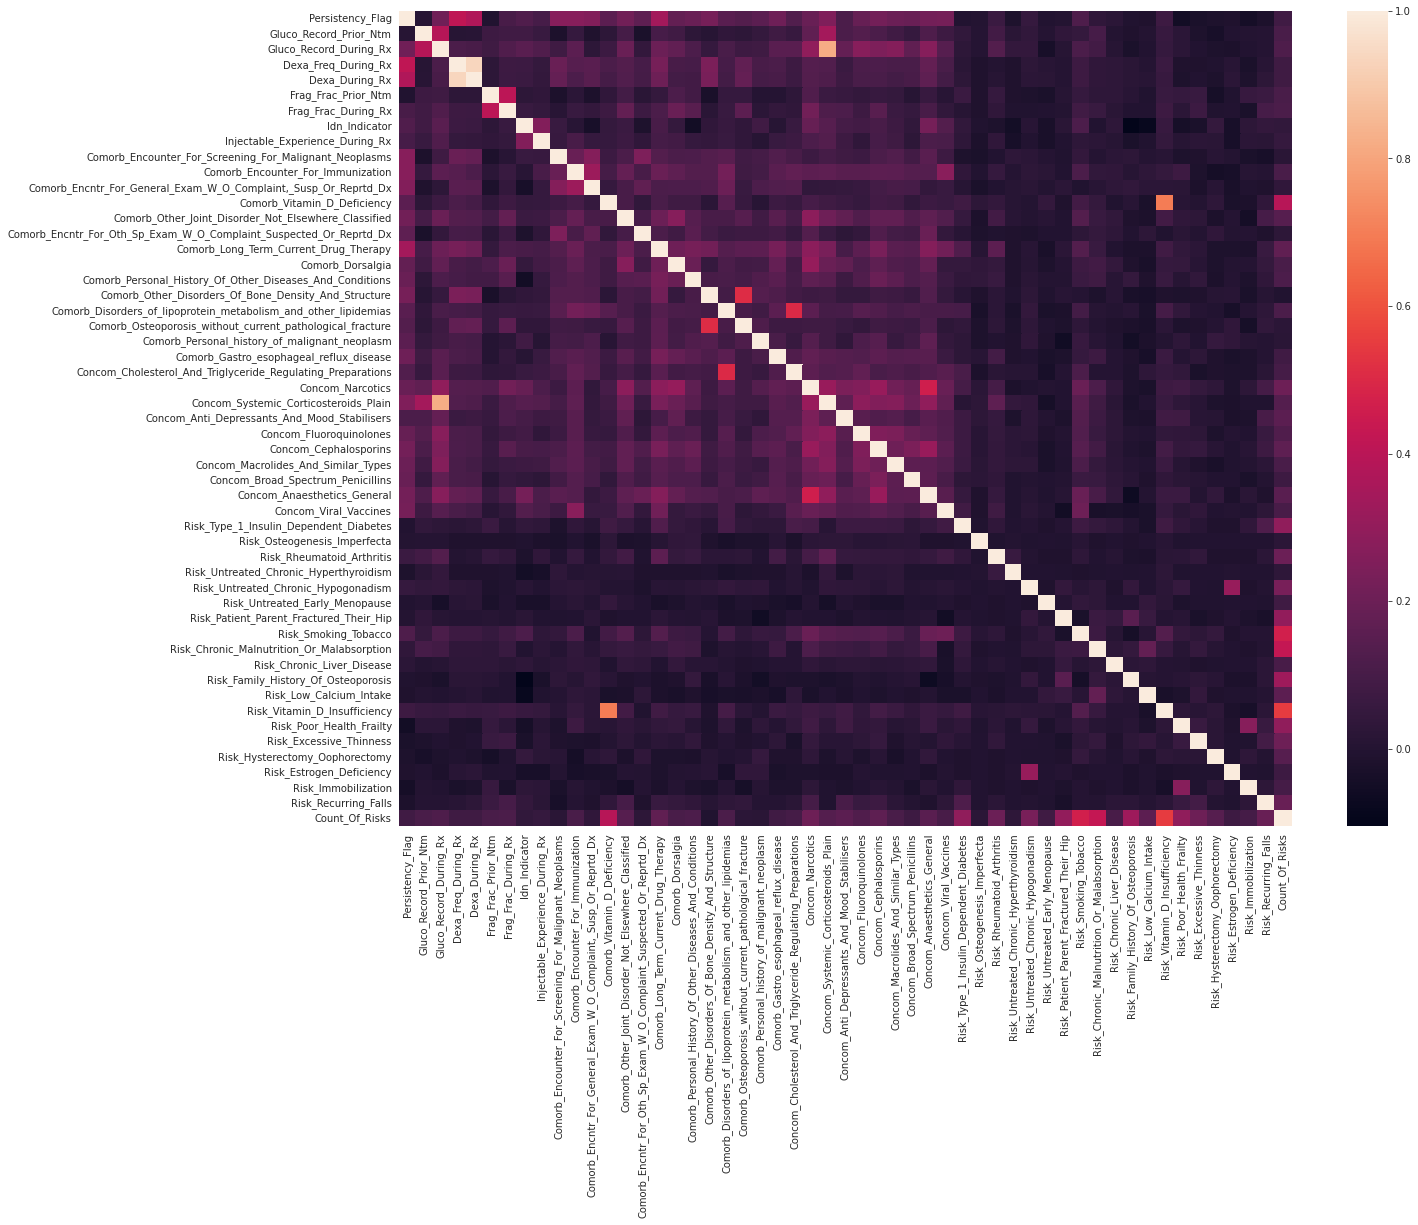

In [67]:
plt.subplots(figsize=(20,15))
sbn.heatmap(veri.corr())

In [68]:
X=veri.drop(['Persistency_Flag'],axis=1)
y=veri['Persistency_Flag']

X = pd.get_dummies(X)
X.columns=[x.lower() for x in X.columns]

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [69]:
df_train = X_train.copy()
df_train['Persistency_Flag'] = y_train
df_train.head()

gluco_record_prior_ntm  gluco_record_during_rx  dexa_freq_during_rx  \
1128                       0                       0                    0   
1195                       0                       0                    0   
2434                       0                       0                    0   
647                        0                       0                    0   
958                        0                       1                    0   

      dexa_during_rx  frag_frac_prior_ntm  frag_frac_during_rx  idn_indicator  \
1128               0                    0                    0              1   
1195               0                    0                    0              1   
2434               0                    0                    0              1   
647                0                    0                    0              1   
958                0                    0                    0              1   

      injectable_experience_during_rx  \
1128                                1   
1195                                0   
2434                                1   
647                                 1   
958                                 1   

      comorb_encounter_for_screening_for_malignant_neoplasms  \
1128                                                  0        
1195                                                  1        
2434                                                  0        
647                                                   1        
958                                                   0        

      comorb_encounter_for_immunization  ...  change_t_score_no change  \
1128                                  0  ...                         0   
1195                                  0  ...                         0   
2434                                  0  ...                         1   
647                                   1  ...                         1   
958                                   1  ...                         0   

      change_t_score_unknown  change_t_score_worsened  \
1128                       0                        0   
1195                       1                        0   
2434                       0                        0   
647                        0                        0   
958                        0                        0   

      change_risk_segment_improved  change_risk_segment_no change  \
1128                             0                              0   
1195                             0                              0   
2434                             0                              0   
647                              0                              1   
958                              0                              0   

      change_risk_segment_unknown  change_risk_segment_worsened  \
1128                            1                             0   
1195                            1                             0   
2434                            1                             0   
647                             0                             0   
958                             1                             0   

      adherent_flag_adherent  adherent_flag_non-adherent  Persistency_Flag  
1128                       1                           0                 1  
1195                       1                           0                 0  
2434                       1                           0                 0  
647                        1                           0                 0  
958                        1                           0                 1  

[5 rows x 131 columns]

In [71]:
classes=df_train['Persistency_Flag'].value_counts()
normal_share=round(classes[0]/df_train['Persistency_Flag'].count()*100,2)
fraud_share=round(classes[1]/df_train['Persistency_Flag'].count()*100, 2)
print("Non-Persistent : {} %".format(normal_share))
print("Persistent : {} %".format(fraud_share))

Non-Persistent : 69.72 %
Persistent : 30.28 %


In [72]:
fig = px.histogram(df_train, x="Persistency_Flag", color="Persistency_Flag", title="Persistent class histogram")
fig.show()


In [73]:
df_minority_upsampled = resample(df_train[df_train['Persistency_Flag'] == 1], replace=True,
                                 n_samples=len(df_train[df_train['Persistency_Flag'] == 0]), random_state=42)

df_train = pd.concat([df_train[df_train['Persistency_Flag'] == 0], df_minority_upsampled])

df_train.Persistency_Flag.value_counts()

0    1446
1    1446
Name: Persistency_Flag, dtype: int64

In [74]:
X_train=df_train.drop(['Persistency_Flag'],axis=1)
y_train=df_train['Persistency_Flag']

fig = px.histogram(df_train, x="Persistency_Flag", color="Persistency_Flag", title="Persistent class histogram")
fig.show()

In [76]:
model = SVC(kernel = 'linear', random_state=123)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy upon the test data is (Test verilerinin doğruluğu) {100*accuracy:.2f} %')

Accuracy upon the test data is (Test verilerinin doğruluğu) 77.08 %


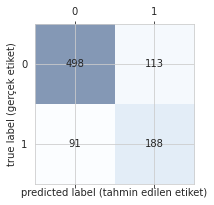

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       611
           1       0.62      0.67      0.65       279

    accuracy                           0.77       890
   macro avg       0.74      0.74      0.74       890
weighted avg       0.78      0.77      0.77       890



In [79]:
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('predicted label (tahmin edilen etiket)')
    plt.ylabel('true label (gerçek etiket)')
    plt.tight_layout()
    plt.show()

confmat = confusion_matrix(y_test, predictions)
plot_confusion_matrix(confmat)
print(classification_report(y_test, predictions))

In [83]:
target_names=['Non-Persistent', 'Persistent']

In [84]:
def evaluation_metrics(y_test, y_pre, target_names):
    #scores
    print("Accuracy :",accuracy_score(y_test,y_pre))
    print("Precision :",precision_score(y_test,y_pre))
    print("Recall :",recall_score(y_test,y_pre))
    print("F1 Score :",f1_score(y_test,y_pre))

    print(classification_report(y_test, y_pre, target_names=target_names))

    #AUC
    fpr, tpr, _ = roc_curve(y_test,  y_pre)
    auc = roc_auc_score(y_test, y_pre)
    print("AUC :", auc)

    #ROC
    plt.plot(fpr,tpr,label="uc={:.3f})".format(auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc=4)
    plt.show()

    #CM matrix
    matrix = confusion_matrix(y_test, y_pre)
    cm = pd.DataFrame(matrix, index=target_names, columns=target_names)

    sbn.heatmap(cm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
    plt.title("Confusion Matrix"), plt.tight_layout()
    plt.ylabel("True Class"), plt.xlabel("Predicted Class")
    plt.show()

In [85]:
def logistic(X_train,X_test,y_train,y_test):
    model=LogisticRegression()
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    evaluation_metrics(y_test, y_pre, target_names)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy : 0.7707865168539326
Precision : 0.6254180602006689
Recall : 0.6702508960573477
F1 Score : 0.6470588235294118
                precision    recall  f1-score   support

Non-Persistent       0.84      0.82      0.83       611
    Persistent       0.63      0.67      0.65       279

      accuracy                           0.77       890
     macro avg       0.73      0.74      0.74       890
  weighted avg       0.78      0.77      0.77       890

AUC : 0.7434724202054332


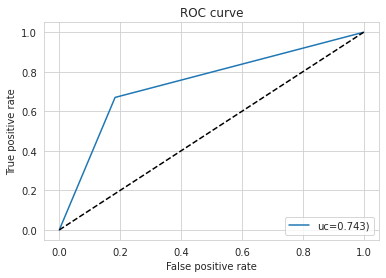

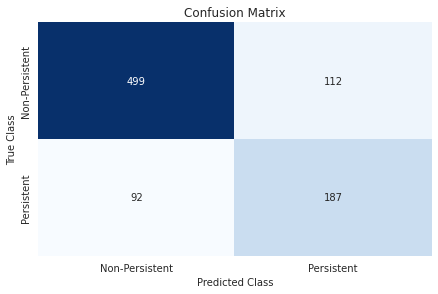

In [86]:
logistic(X_train,X_test,y_train,y_test)

In [87]:
def Ridge(X_train,X_test,y_train,y_test):
    #train the model
    model = RidgeClassifier(random_state=2)
    model.fit(X_train, y_train)
    #predictions
    y_pre = model.predict(X_test)
    evaluation_metrics(y_test, y_pre, target_names)

Accuracy : 0.7696629213483146
Precision : 0.6275862068965518
Recall : 0.6523297491039427
F1 Score : 0.6397188049209139
                precision    recall  f1-score   support

Non-Persistent       0.84      0.82      0.83       611
    Persistent       0.63      0.65      0.64       279

      accuracy                           0.77       890
     macro avg       0.73      0.74      0.74       890
  weighted avg       0.77      0.77      0.77       890

AUC : 0.7377851691509894


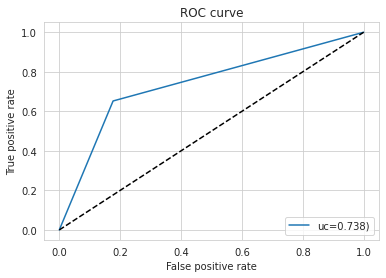

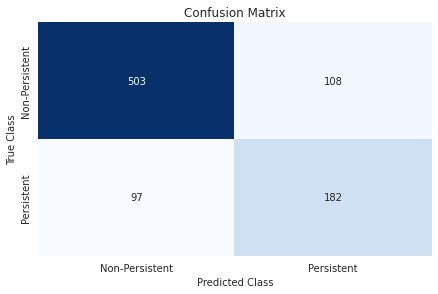

In [88]:
Ridge(X_train,X_test,y_train,y_test)

In [89]:
def SGD(X_train,X_test,y_train,y_test):
    #train the model
    model = SGDClassifier()
    model.fit(X_train, y_train)
    #predictions
    y_pre = model.predict(X_test)
    evaluation_metrics(y_test, y_pre, target_names)

Accuracy : 0.7573033707865169
Precision : 0.6
Recall : 0.6774193548387096
F1 Score : 0.6363636363636364
                precision    recall  f1-score   support

Non-Persistent       0.84      0.79      0.82       611
    Persistent       0.60      0.68      0.64       279

      accuracy                           0.76       890
     macro avg       0.72      0.74      0.73       890
  weighted avg       0.77      0.76      0.76       890

AUC : 0.7356000211182091


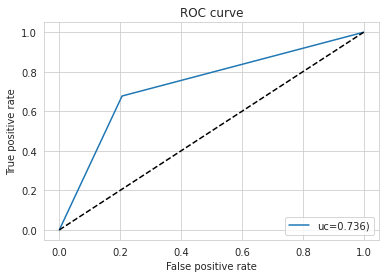

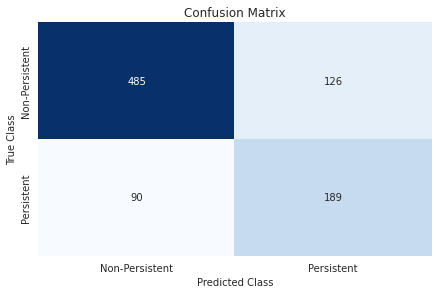

In [90]:
SGD(X_train,X_test,y_train,y_test)

In [91]:
def RF(X_train,X_test,y_train,y_test):
  #train the model
  model = RandomForestClassifier(random_state=2)
  model.fit(X_train, y_train)
  #predictions
  y_pre = model.predict(X_test)
  evaluation_metrics(y_test, y_pre, target_names)

Accuracy : 0.7876404494382022
Precision : 0.7272727272727273
Recall : 0.5161290322580645
F1 Score : 0.6037735849056604
                precision    recall  f1-score   support

Non-Persistent       0.80      0.91      0.85       611
    Persistent       0.73      0.52      0.60       279

      accuracy                           0.79       890
     macro avg       0.77      0.71      0.73       890
  weighted avg       0.78      0.79      0.78       890

AUC : 0.7138746634285412


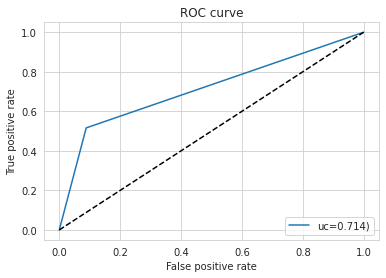

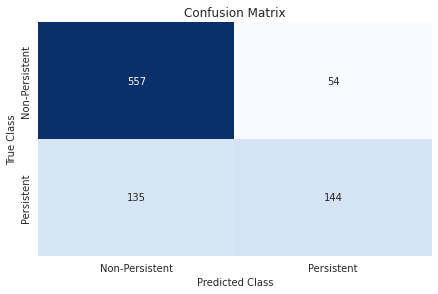

In [92]:
RF(X_train,X_test,y_train,y_test)

In [93]:
def Bagging(X_train,X_test,y_train,y_test):
  #train the model
  model = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0)
  model.fit(X_train, y_train)
  #predictions
  y_pre = model.predict(X_test)
  evaluation_metrics(y_test, y_pre, target_names)

Accuracy : 0.8
Precision : 0.6759581881533101
Recall : 0.6953405017921147
F1 Score : 0.6855123674911662
                precision    recall  f1-score   support

Non-Persistent       0.86      0.85      0.85       611
    Persistent       0.68      0.70      0.69       279

      accuracy                           0.80       890
     macro avg       0.77      0.77      0.77       890
  weighted avg       0.80      0.80      0.80       890

AUC : 0.7715655045785451


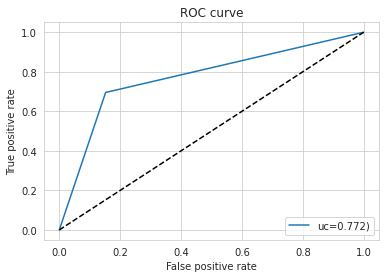

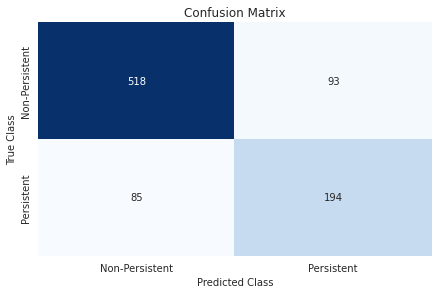

In [94]:
Bagging(X_train,X_test,y_train,y_test)

In [95]:
def AdaBoost(X_train,X_test,y_train,y_test):
  #train the model
  model = AdaBoostClassifier(n_estimators=100, random_state=0)
  model.fit(X_train, y_train)
  #predictions
  y_pre = model.predict(X_test)
  evaluation_metrics(y_test, y_pre, target_names)

Accuracy : 0.7775280898876404
Precision : 0.6363636363636364
Recall : 0.6774193548387096
F1 Score : 0.65625
                precision    recall  f1-score   support

Non-Persistent       0.85      0.82      0.84       611
    Persistent       0.64      0.68      0.66       279

      accuracy                           0.78       890
     macro avg       0.74      0.75      0.75       890
  weighted avg       0.78      0.78      0.78       890

AUC : 0.7503299720183727


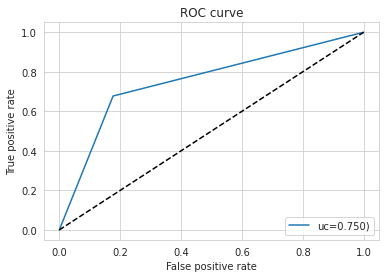

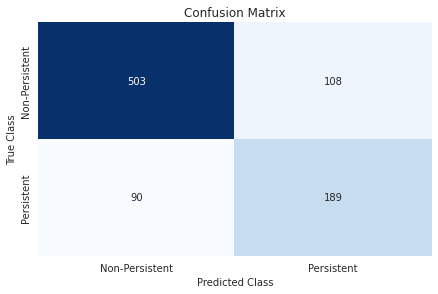

In [96]:
AdaBoost(X_train,X_test,y_train,y_test)

In [97]:
def ExtraTrees(X_train,X_test,y_train,y_test):
  #train the model
  model = ExtraTreesClassifier(n_estimators=100, random_state=0)
  model.fit(X_train, y_train)
  #predictions
  y_pre = model.predict(X_test)
  evaluation_metrics(y_test, y_pre, target_names)

Accuracy : 0.7786516853932585
Precision : 0.777027027027027
Recall : 0.4121863799283154
F1 Score : 0.5386416861826697
                precision    recall  f1-score   support

Non-Persistent       0.78      0.95      0.85       611
    Persistent       0.78      0.41      0.54       279

      accuracy                           0.78       890
     macro avg       0.78      0.68      0.70       890
  weighted avg       0.78      0.78      0.76       890

AUC : 0.6790882799805243


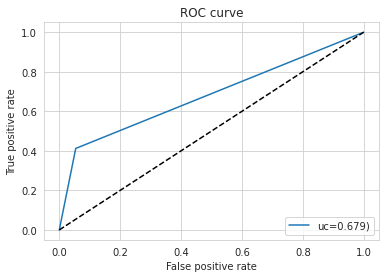

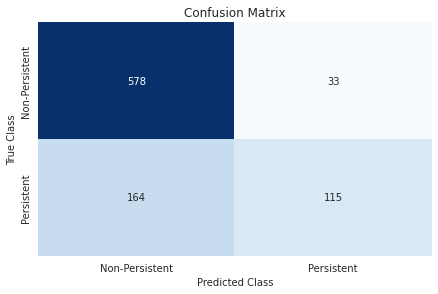

In [98]:
ExtraTrees(X_train,X_test,y_train,y_test)

In [101]:
def Stacking(X_train,X_test,y_train,y_test):
  #train the model
  estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)), ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]
  model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
  model.fit(X_train, y_train)
  #predictions
  y_pre = model.predict(X_test)
  evaluation_metrics(y_test, y_pre, target_names)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Accuracy : 0.7865168539325843
Precision : 0.7431693989071039
Recall : 0.4874551971326165
F1 Score : 0.5887445887445888
                precision    recall  f1-score   support

Non-Persistent       0.80      0.92      0.86       611
    Persistent       0.74      0.49      0.59       279

      accuracy                           0.79       890
     macro avg       0.77      0.71      0.72       890
  weighted avg       0.78      0.79      0.77       890

AUC : 0.7052660601047698


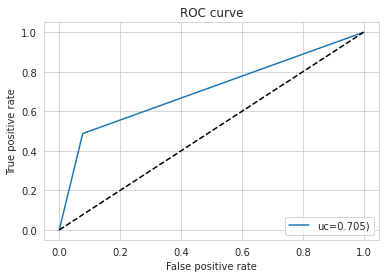

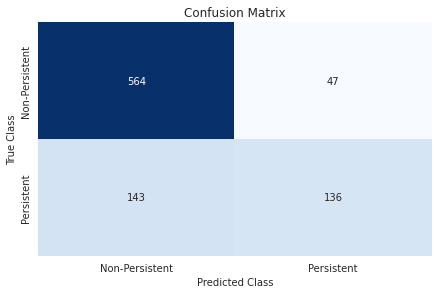

In [102]:
Stacking(X_train,X_test,y_train,y_test)

In [103]:
def XGBOOST(X_train,X_test,y_train,y_test):
  #train the model
  model = XGBClassifier(random_state=2)
  model.fit(X_train, y_train)
  #predictions
  y_pre = model.predict(X_test)
  evaluation_metrics(y_test, y_pre, target_names)

Accuracy : 0.7887640449438202
Precision : 0.6585365853658537
Recall : 0.6774193548387096
F1 Score : 0.6678445229681979
                precision    recall  f1-score   support

Non-Persistent       0.85      0.84      0.85       611
    Persistent       0.66      0.68      0.67       279

      accuracy                           0.79       890
     macro avg       0.75      0.76      0.76       890
  weighted avg       0.79      0.79      0.79       890

AUC : 0.7585132780740192


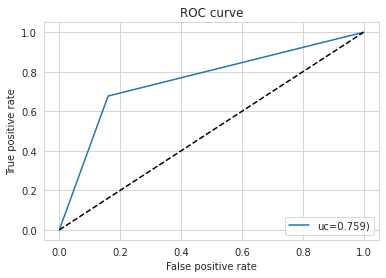

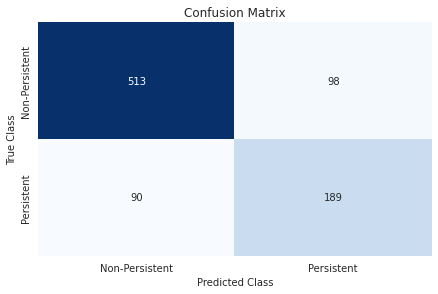

In [104]:
XGBOOST(X_train.values,X_test.values,y_train,y_test)

In [105]:
def MLP(X_train,X_test,y_train,y_test):
  #train the model
  mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(100,100), random_state=2)
  mlp.fit(X_train, y_train)
  mlp.get_params(deep=True)
  #predictions
  y_pre = mlp.predict(X_test)
  evaluation_metrics(y_test, y_pre, target_names)

Accuracy : 0.7629213483146068
Precision : 0.6416666666666667
Recall : 0.5519713261648745
F1 Score : 0.5934489402697496
                precision    recall  f1-score   support

Non-Persistent       0.81      0.86      0.83       611
    Persistent       0.64      0.55      0.59       279

      accuracy                           0.76       890
     macro avg       0.72      0.71      0.71       890
  weighted avg       0.76      0.76      0.76       890

AUC : 0.7056092310038776


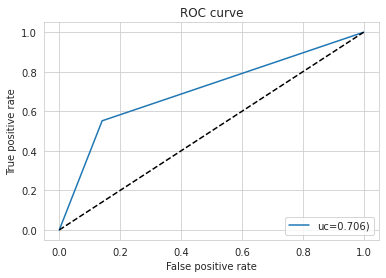

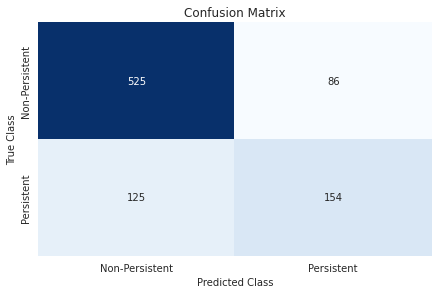

In [106]:
MLP(X_train,X_test,y_train,y_test)

In [107]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization

In [121]:
def MNN(X_train,X_test,y_train,y_test):
  #train the model
  model = Sequential()
  model.add(Dense(24, input_shape=(X_train.shape[1],), activation='relu')),
  model.add(Dropout(0.2)),
  model.add(Dense(12, activation='relu')),
  model.add(Dropout(0.2)),
  model.add(Dense(6, activation='relu')),
  model.add(Dropout(0.2)),
  model.add(Dense(3, activation='relu')),
  model.add(Dropout(0.2)),
  model.add(Dense(1, activation='sigmoid'))

  opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

  model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

  earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=15, verbose=1, mode='auto', baseline=None, restore_best_weights=False)

  history = model.fit(X_train.values, y_train.values, epochs = 150, batch_size=10, validation_split = 0.20, verbose = 1, callbacks = [earlystopper])
  history_dict = history.history

  loss_values = history_dict['loss']
  val_loss_values=history_dict['val_loss']
  plt.plot(loss_values,'b',label='training loss')
  plt.plot(val_loss_values,'r',label='val training loss')
  plt.legend()
  plt.xlabel("Epochs")
  plt.show()  

  accuracy_values = history_dict['accuracy']
  val_accuracy_values=history_dict['val_accuracy']
  plt.plot(val_accuracy_values,'-r',label='val_accuracy')
  plt.plot(accuracy_values,'-b',label='accuracy')
  plt.legend()
  plt.xlabel("Epochs")
  plt.show()

  #predictions
  y_pre = model.predict_classes(X_test)

  evaluation_metrics(y_test, y_pre, target_names)

Epoch 1/150
232/232 [==============================] - 3s 5ms/step - loss: 0.6916 - accuracy: 0.5145 - val_loss: 0.6746 - val_accuracy: 0.4180
Epoch 2/150
232/232 [==============================] - 1s 3ms/step - loss: 0.6864 - accuracy: 0.5793 - val_loss: 0.6681 - val_accuracy: 0.3592
Epoch 3/150
232/232 [==============================] - 1s 4ms/step - loss: 0.6820 - accuracy: 0.6187 - val_loss: 0.6639 - val_accuracy: 0.3523
Epoch 4/150
232/232 [==============================] - 1s 3ms/step - loss: 0.6745 - accuracy: 0.6576 - val_loss: 0.6572 - val_accuracy: 0.3679
Epoch 5/150
232/232 [==============================] - 1s 3ms/step - loss: 0.6736 - accuracy: 0.6559 - val_loss: 0.6519 - val_accuracy: 0.3851
Epoch 6/150
232/232 [==============================] - 1s 3ms/step - loss: 0.6685 - accuracy: 0.6667 - val_loss: 0.6472 - val_accuracy: 0.3903
Epoch 7/150
232/232 [==============================] - 1s 4ms/step - loss: 0.6629 - accuracy: 0.6714 - val_loss: 0.6450 - val_accuracy: 0.3869

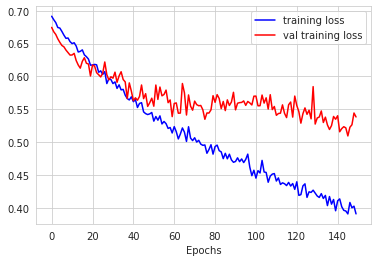

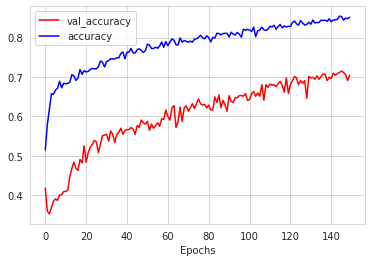

AttributeError: ignored

In [122]:
MNN(X_train,X_test,y_train,y_test)

In [124]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [125]:
tahminDizisi = model.predict(X_test)

In [126]:
tahminDizisi

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,

In [127]:
mean_absolute_error(y_test,tahminDizisi)

0.2292134831460674

In [128]:
veri.describe()

Persistency_Flag  Gluco_Record_Prior_Ntm  Gluco_Record_During_Rx  \
count       2964.000000             2964.000000             2964.000000   
mean           0.306005                0.238866                0.251012   
std            0.460910                0.426463                0.433669   
min            0.000000                0.000000                0.000000   
25%            0.000000                0.000000                0.000000   
50%            0.000000                0.000000                0.000000   
75%            1.000000                0.000000                1.000000   
max            1.000000                1.000000                1.000000   

       Dexa_Freq_During_Rx  Dexa_During_Rx  Frag_Frac_Prior_Ntm  \
count          2964.000000     2964.000000          2964.000000   
mean              0.791161        0.160594             0.153846   
std               1.929025        0.367218             0.360862   
min               0.000000        0.000000             0.000000   
25%               0.000000        0.000000             0.000000   
50%               0.000000        0.000000             0.000000   
75%               0.000000        0.000000             0.000000   
max               7.000000        1.000000             1.000000   

       Frag_Frac_During_Rx  Idn_Indicator  Injectable_Experience_During_Rx  \
count          2964.000000    2964.000000                      2964.000000   
mean              0.112348       0.748988                         0.889676   
std               0.315848       0.433669                         0.313346   
min               0.000000       0.000000                         0.000000   
25%               0.000000       0.000000                         1.000000   
50%               0.000000       1.000000                         1.000000   
75%               0.000000       1.000000                         1.000000   
max               1.000000       1.000000                         1.000000   

       Comorb_Encounter_For_Screening_For_Malignant_Neoplasms  ...  \
count                                        2964.000000       ...   
mean                                            0.402834       ...   
std                                             0.490551       ...   
min                                             0.000000       ...   
25%                                             0.000000       ...   
50%                                             0.000000       ...   
75%                                             1.000000       ...   
max                                             1.000000       ...   

       Risk_Family_History_Of_Osteoporosis  Risk_Low_Calcium_Intake  \
count                          2964.000000              2964.000000   
mean                              0.102227                 0.012821   
std                               0.302997                 0.112519   
min                               0.000000                 0.000000   
25%                               0.000000                 0.000000   
50%                               0.000000                 0.000000   
75%                               0.000000                 0.000000   
max                               1.000000                 1.000000   

       Risk_Vitamin_D_Insufficiency  Risk_Poor_Health_Frailty  \
count                   2964.000000               2964.000000   
mean                       0.473684                  0.055668   
std                        0.499391                  0.229318   
min                        0.000000                  0.000000   
25%                        0.000000                  0.000000   
50%                        0.000000                  0.000000   
75%                        1.000000                  0.000000   
max                        1.000000                  1.000000   

       Risk_Excessive_Thinness  Risk_Hysterectomy_Oophorectomy  \
count              2964.000000                     2964.000000   
mean                  0.022267     

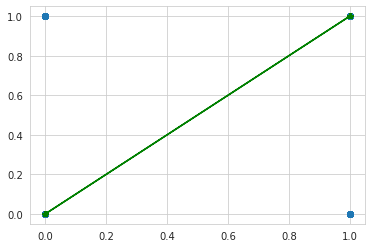

In [131]:
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"g-*")

In [132]:
veri.iloc[2]

Persistency_Flag                              0
Gender                                   Female
Race                              Other/Unknown
Ethnicity                              Hispanic
Region                                  Midwest
                                      ...      
Risk_Hysterectomy_Oophorectomy                0
Risk_Estrogen_Deficiency                      0
Risk_Immobilization                           0
Risk_Recurring_Falls                          0
Count_Of_Risks                                2
Name: 2, Length: 68, dtype: object